# Masters Research- Predictive Analysis On Bitcoin Price Using Machine Learning and Deep Learning Algorithms


In [1]:
# Filtering out the warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.tsa.stattools as adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as px
import pmdarima as pm
from keras.models import Sequential
from keras.layers import Dense , LSTM , Dropout , Bidirectional
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
plt.style.use('seaborn-darkgrid')
%matplotlib inline

In [3]:
# Importing the Dataset.
df=pd.read_csv("C:\\Users\\shrey\\OneDrive\\Desktop\\Research\\bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")

In [4]:
# Checking the data.
df.head()

Timestamp  Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1325317920  4.39  4.39  4.39   4.39      0.455581                2.0   
1  1325317980   NaN   NaN   NaN    NaN           NaN                NaN   
2  1325318040   NaN   NaN   NaN    NaN           NaN                NaN   
3  1325318100   NaN   NaN   NaN    NaN           NaN                NaN   
4  1325318160   NaN   NaN   NaN    NaN           NaN                NaN   

   Weighted_Price  
0            4.39  
1             NaN  
2             NaN  
3             NaN  
4             NaN

In [5]:
#Checking the data type of variables.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [6]:
# Describing the data.
df.describe()

Timestamp          Open          High           Low         Close  \
count  4.857377e+06  3.613769e+06  3.613769e+06  3.613769e+06  3.613769e+06   
mean   1.471301e+09  6.009024e+03  6.013357e+03  6.004488e+03  6.009014e+03   
std    8.428019e+07  8.996247e+03  9.003521e+03  8.988778e+03  8.996360e+03   
min    1.325318e+09  3.800000e+00  3.800000e+00  1.500000e+00  1.500000e+00   
25%    1.398179e+09  4.438600e+02  4.440000e+02  4.435200e+02  4.438600e+02   
50%    1.471428e+09  3.596970e+03  3.598190e+03  3.595620e+03  3.597000e+03   
75%    1.544288e+09  8.627270e+03  8.632980e+03  8.621090e+03  8.627160e+03   
max    1.617149e+09  6.176356e+04  6.178183e+04  6.167355e+04  6.178180e+04   

       Volume_(BTC)  Volume_(Currency)  Weighted_Price  
count  3.613769e+06       3.613769e+06    3.613769e+06  
mean   9.323249e+00       4.176284e+04    6.008935e+03  
std    3.054989e+01       1.518248e+05    8.995992e+03  
min    0.000000e+00       0.000000e+00    3.800000e+00  
25%    4.097759e-01       4.521422e+02    4.438306e+02  
50%    1.979811e+00       3.810124e+03    3.596804e+03  
75%    7.278216e+00       2.569821e+04    8.627637e+03  
max    5.853852e+03       1.390067e+07    6.171621e+04

In [7]:
#Checking the shape of the dataset.
df.shape

(4857377, 8)

In [8]:
#Converting the 'Timestamp' column into 'datetime' data type
df.Timestamp=pd.to_datetime(df.Timestamp, unit='s')

In [9]:
# Setting Timestamp column as our index.
df=df.set_index('Timestamp', drop=True)

In [10]:
# Percentage of null values.
round((df.isnull().sum()/df.shape[0])*100, 2)

Open                 25.6
High                 25.6
Low                  25.6
Close                25.6
Volume_(BTC)         25.6
Volume_(Currency)    25.6
Weighted_Price       25.6
dtype: float64

- All the features have 25.6% null values.

In [11]:
# Checking the data again.
df.head()

Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
Timestamp                                                                       
2011-12-31 07:52:00  4.39  4.39  4.39   4.39      0.455581                2.0   
2011-12-31 07:53:00   NaN   NaN   NaN    NaN           NaN                NaN   
2011-12-31 07:54:00   NaN   NaN   NaN    NaN           NaN                NaN   
2011-12-31 07:55:00   NaN   NaN   NaN    NaN           NaN                NaN   
2011-12-31 07:56:00   NaN   NaN   NaN    NaN           NaN                NaN   

                     Weighted_Price  
Timestamp                            
2011-12-31 07:52:00            4.39  
2011-12-31 07:53:00             NaN  
2011-12-31 07:54:00             NaN  
2011-12-31 07:55:00             NaN  
2011-12-31 07:56:00             NaN

- Data is distributed by minutes and hence the data set is huge consisting of 4857377 records.

# EDA & Data Visualization

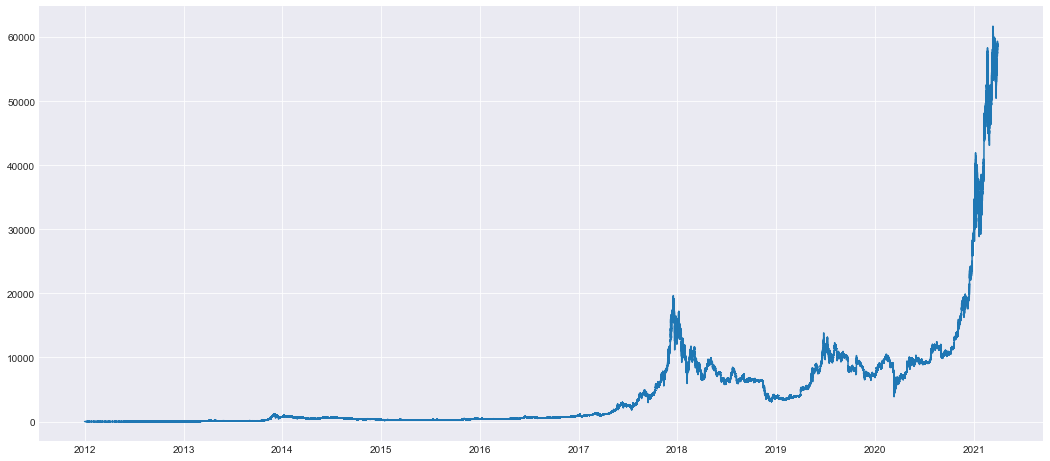

In [12]:
# Plotting a simple chart to visualize the price.
plt.figure(figsize=(18,8))
plt.plot(df.Weighted_Price)
plt.show()

### From the above plot the following inferences can be made:
- It is evident that the data is very noisy and it is difficult to recognize any trends or patterns.
- The data is noisy because it is distributed by minutes and there are too many fluctuations in the price with such a short interval of time.

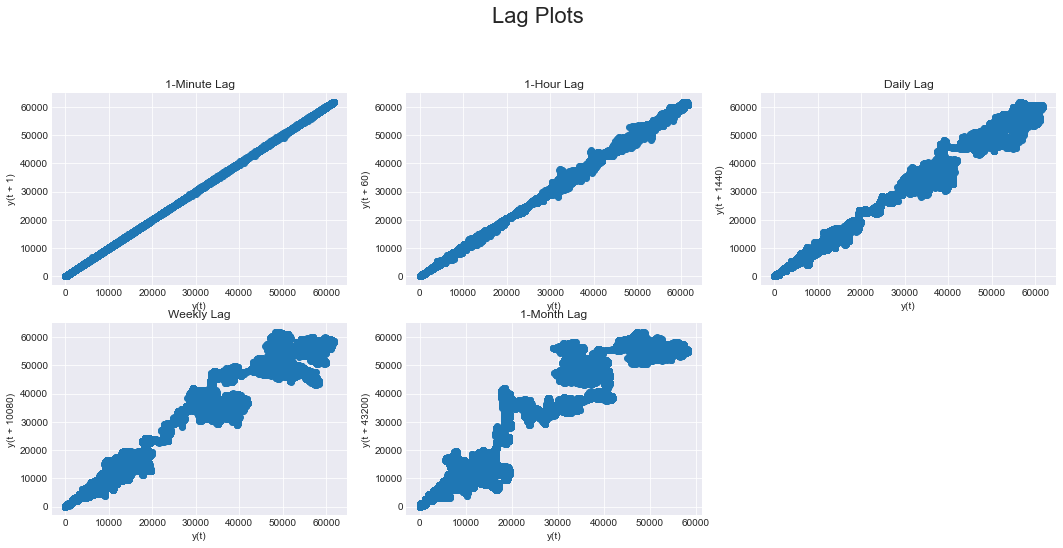

In [13]:
plt.figure(figsize=(18,12))
plt.suptitle('Lag Plots', fontsize=22)

# Minute lag
plt.subplot(3,3,1)
pd.plotting.lag_plot(df['Weighted_Price'], lag=1) 
plt.title('1-Minute Lag')

# Hourly lag
plt.subplot(3,3,2)
pd.plotting.lag_plot(df['Weighted_Price'], lag=60) 
plt.title('1-Hour Lag')

#Daily lag
plt.subplot(3,3,3)
pd.plotting.lag_plot(df['Weighted_Price'], lag=1440) 
plt.title('Daily Lag')

# Weekly lag
plt.subplot(3,3,4)
pd.plotting.lag_plot(df['Weighted_Price'], lag=10080) 
plt.title('Weekly Lag')

# Monthly lag
plt.subplot(3,3,5)
pd.plotting.lag_plot(df['Weighted_Price'], lag=43200) 
plt.title('1-Month Lag')

plt.show()

### From the above Lag plots the following inferences can be made:
- It is evident that there is a positive autocorrelation for minute, hour and daily lag plots. We observe absolutely no autocorrelation for month lag plot.

- Therefore we can use data which is resampled atmost at the Daily level, thereby preserving the autocorrelation.

In [14]:
# Resampling the data by daily, monthly, qurterly and yearly to visualize the price.
df=df.resample('D').mean()
df_months=df.resample('M').mean()
df_quarters=df.resample('Q-DEC').mean()
df_years=df.resample('A-DEC').mean()

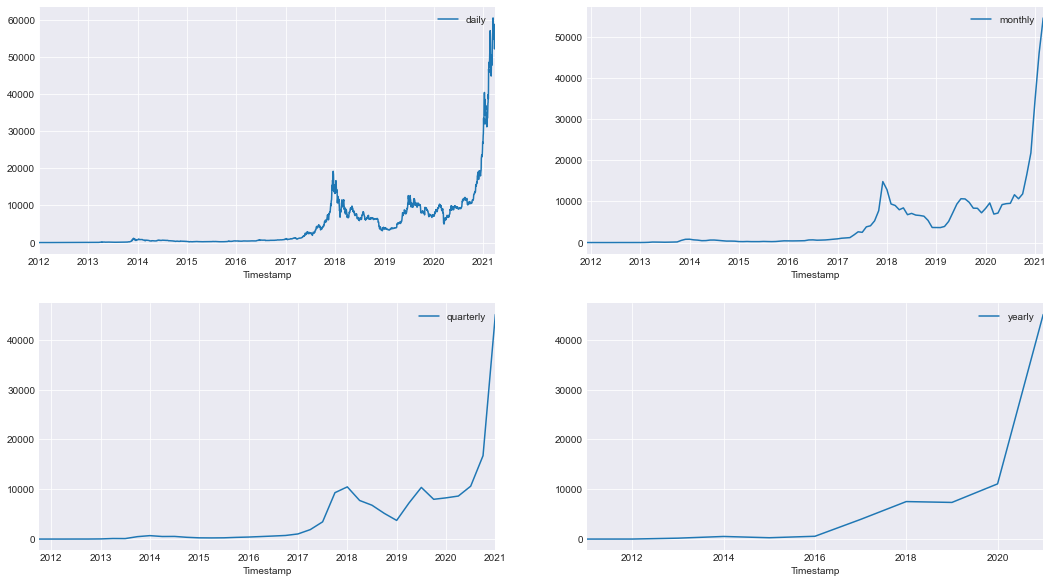

In [15]:
# Visualizing the resampled data.
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
df.Weighted_Price.plot(label='daily', legend=True)
plt.subplot(2,2,2)
df_months.Weighted_Price.plot(label='monthly', legend=True)
plt.subplot(2,2,3)
df_quarters.Weighted_Price.plot(label='quarterly', legend=True)
plt.subplot(2,2,4)
df_years.Weighted_Price.plot(label='yearly', legend=True)
plt.show()

### From the above plots the following inferences can be made:
- The bitcoin price gets smoothened as the time period increases.
- The trends and patterns are gradually lost as we increase the time period above monthly timeframe.

In [16]:
# We shall consider the data resampled at the daily level.
# Checking for null values.
df.isnull().sum()

Open                 3
High                 3
Low                  3
Close                3
Volume_(BTC)         3
Volume_(Currency)    3
Weighted_Price       3
dtype: int64

In [17]:
df[df.Open.isnull()]

Open  High  Low  Close  Volume_(BTC)  Volume_(Currency)  \
Timestamp                                                             
2015-01-06   NaN   NaN  NaN    NaN           NaN                NaN   
2015-01-07   NaN   NaN  NaN    NaN           NaN                NaN   
2015-01-08   NaN   NaN  NaN    NaN           NaN                NaN   

            Weighted_Price  
Timestamp                   
2015-01-06             NaN  
2015-01-07             NaN  
2015-01-08             NaN

In [18]:
# Replacing null values with mean.
mean=df['2015-01-05':'2015-01-09'].mean()
df.loc['2015-01-06']=mean
df.loc['2015-01-07']=mean
df.loc['2015-01-08']=mean

In [19]:
# Checking for null values.
df.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

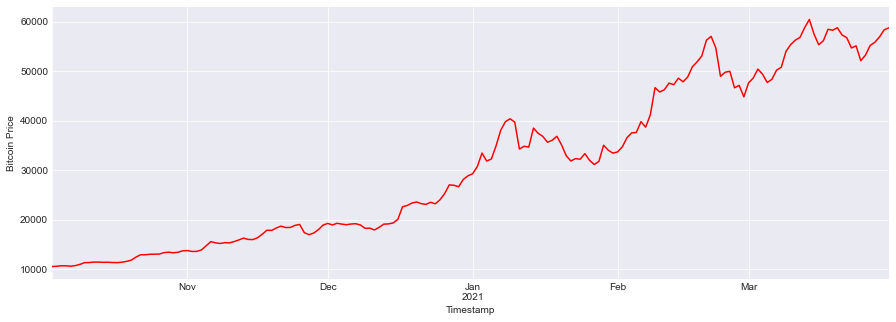

In [20]:
# PLotting price for 2020-2021 time period.
df.Weighted_Price[-180:].plot(figsize=(15,5), color='red')
plt.ylabel('Bitcoin Price')
plt.show()

### From the above plot the following inferences can be made:
- This plot depicts the volatility of bitcoin price, in just 6 months the price has increased by 600% from approximately 10000 USD to a high of above 60000 USD.

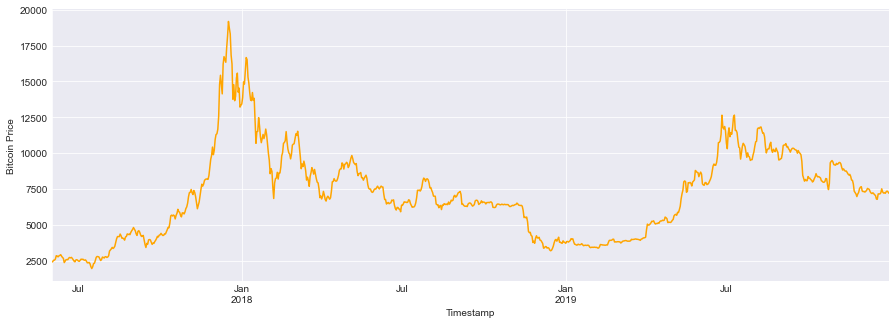

In [21]:
# PLotting price for 2027-2019 time period.
df.Weighted_Price['2017-06-01':'2019'].plot(figsize=(15,5), color='orange')
plt.ylabel('Bitcoin Price')
plt.show()

### From the above plot the following inferences can be made:
- This plot depicts the volatility of bitcoin price, the price was approximately 2500 USD and in mid-December 2017 it has reached its local top at almost 20000 USD which is about 700% increase in price in a span of 6 months.
- After hitting its local top, the downfall begins and in about a year the bitcoin price is almost back to 2500USD, which is equal to the price at the start of the considered time period

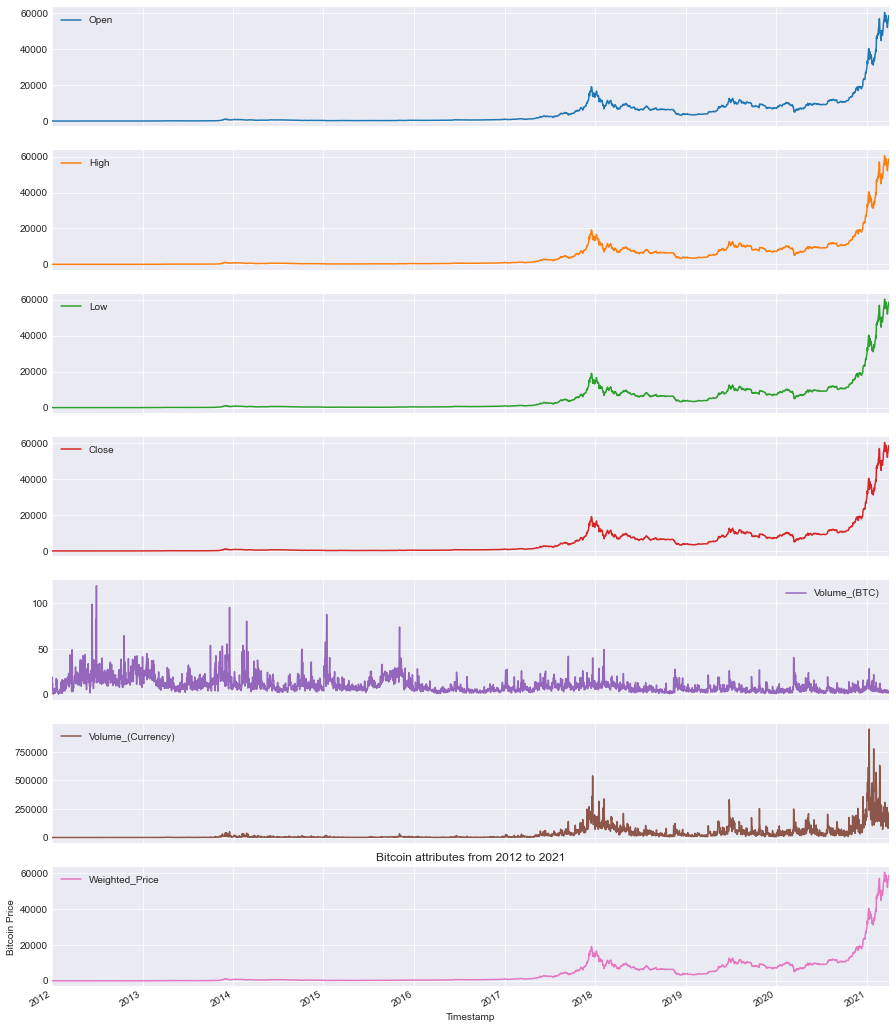

In [22]:
# Visualizing all the features in the dataset.
df['2012':'2021'].plot(subplots=True, figsize=(15,20))
plt.title('Bitcoin attributes from 2012 to 2021')
plt.ylabel('Bitcoin Price')
plt.show()

### From the above plots the following inferences can be made:
- The 'Open', 'High', 'Low', 'Close' and 'Weighted_Price' basically have the same price.
- We see that the volume of BTC has greater spikes initially(2012-2016) compared to the later time frames.
- But the Voulme of currency is greater at the later stages(2021) since the price of BTC has skyrocketed in 2021.

In [23]:
# Plotting an interactive line chart for better visualization across different timelines.
df.reset_index(inplace=True)
fig = px.line(df, x='Timestamp', y='Weighted_Price', title='Bitcoin Price with Range Slider and Selectors')
#fig.update_layout(hovermode="y")

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector={
        'buttons':[
            {'count':1, 'label':"1M", 'step':"month", 'stepmode':"backward"},
            {'count':6, 'label':"6M", 'step':"month", 'stepmode':"backward"},
            {'count':1, 'label':"1Y", 'step':"year", 'stepmode':"backward"},
            {'count':2, 'label':"2Y", 'step':"year", 'stepmode':"backward"},
            {'step':"all"}     
        ]
    }
)
fig.show()
df.set_index(df.Timestamp, inplace=True)
df=df.drop('Timestamp', axis=1)

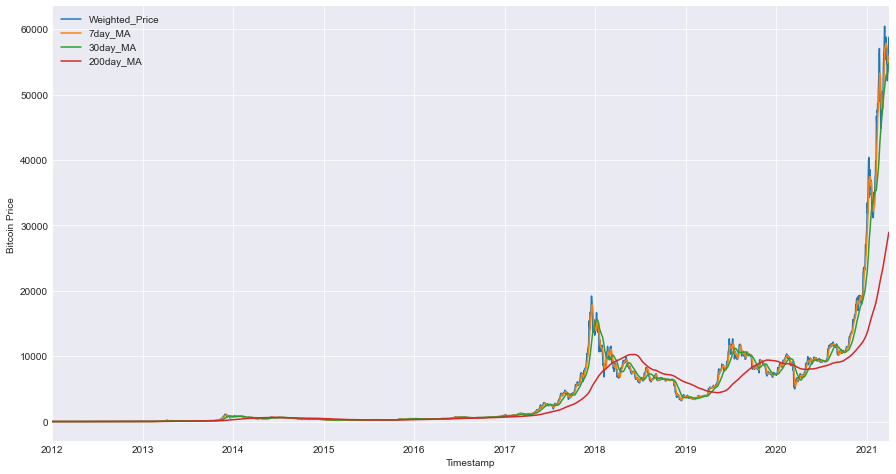

In [24]:
# PLotting 7day, 30day and 200 day moving average along with the price.
df.Weighted_Price.plot(label='Weighted_Price',figsize=(15,8))
df.Weighted_Price.rolling(window=7,min_periods=1).mean().plot(label='7day_MA')
df.Weighted_Price.rolling(window=30, min_periods=1).mean().plot(label='30day_MA')
df.Weighted_Price.rolling(window=200, min_periods=1).mean().plot(label='200day_MA')
plt.ylabel('Bitcoin Price')
plt.legend(loc='best')
plt.show()

### From the above Plot the following inferences can be made:
- We see that the price gets smoothened as the number of days considered for moving average increases.

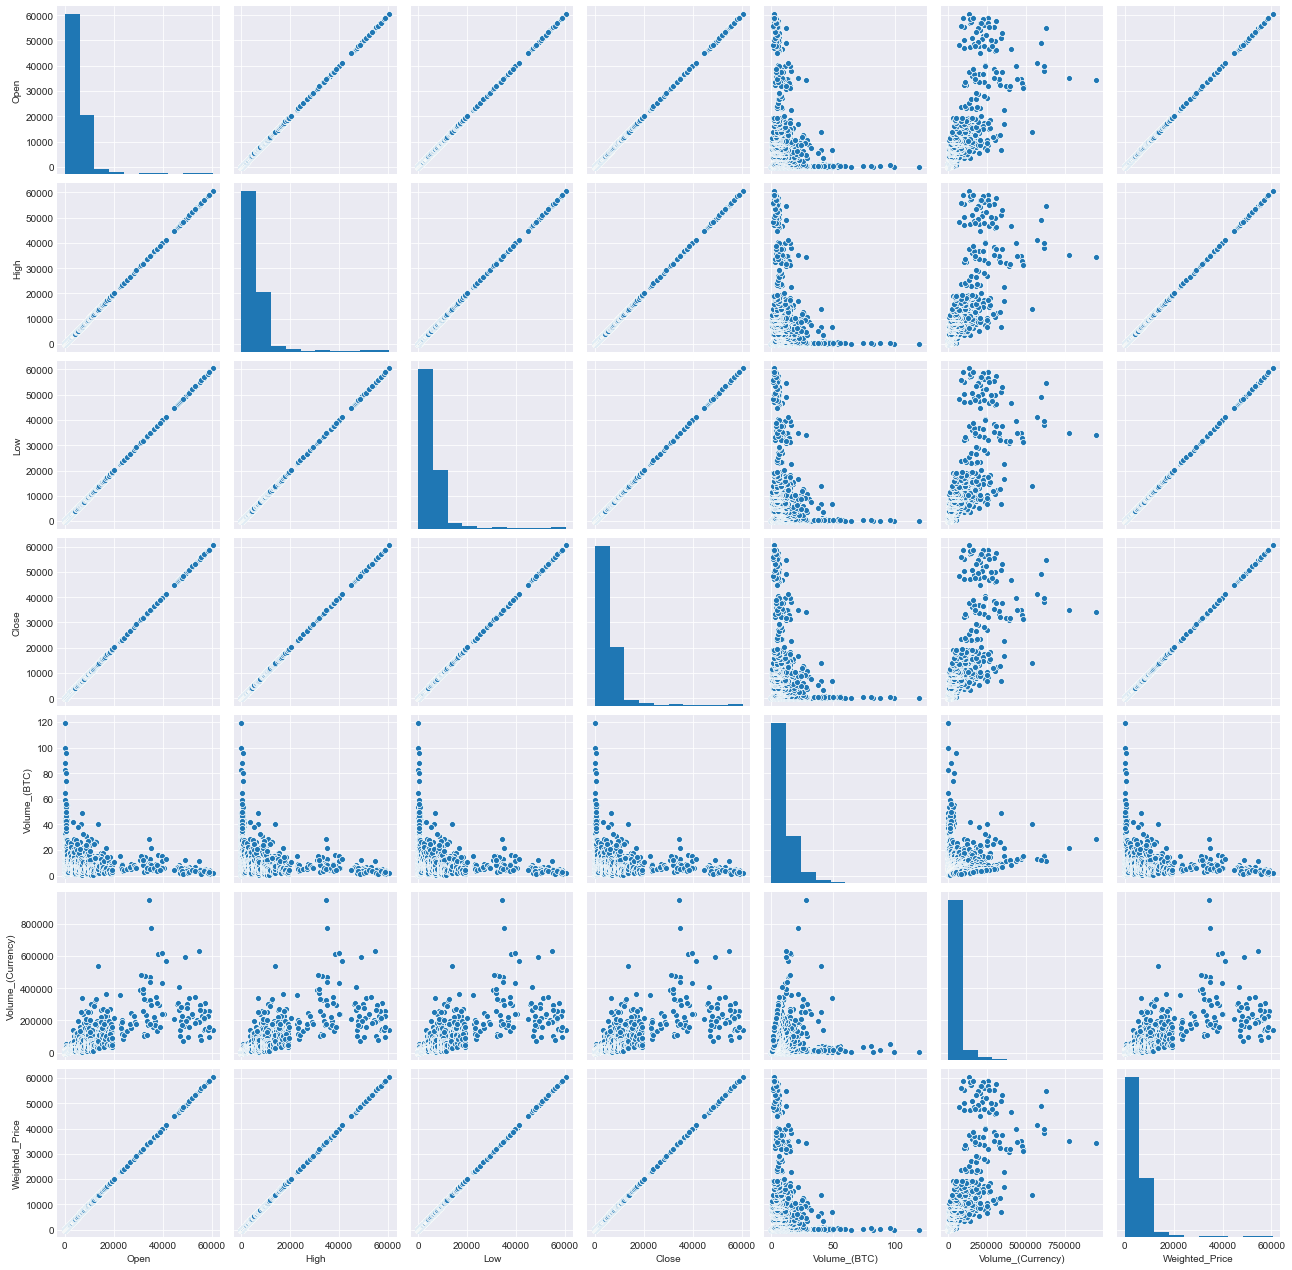

In [25]:
# Pairplots.
sns.pairplot(data=df, kind='scatter')
plt.show()

### From the above pair plots the following inferences can be made:
- It is clearly evident that the 'Open', 'High', 'Low', 'Close' and 'Weighted_Price' are highly linearly correlated.

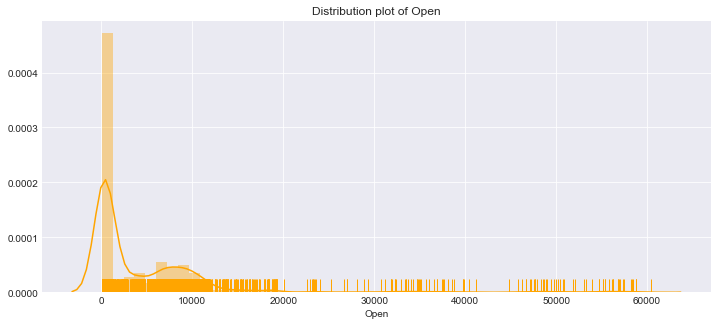

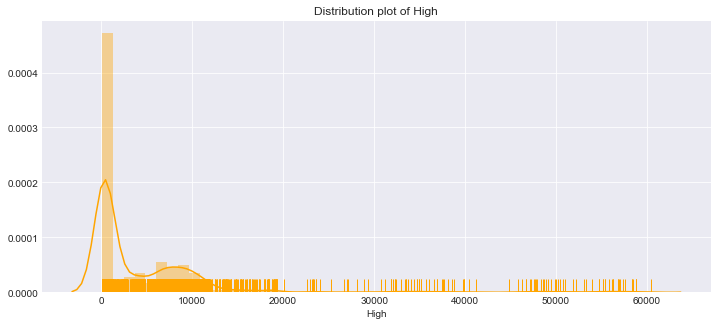

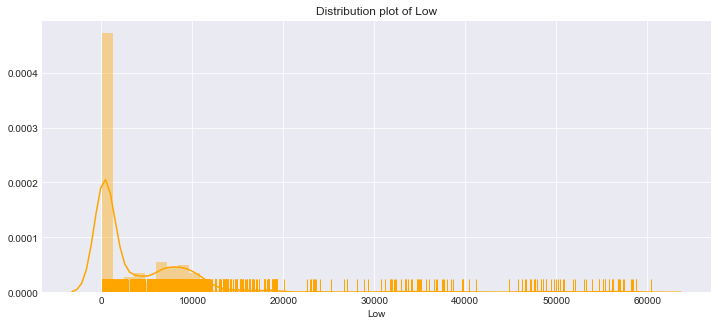

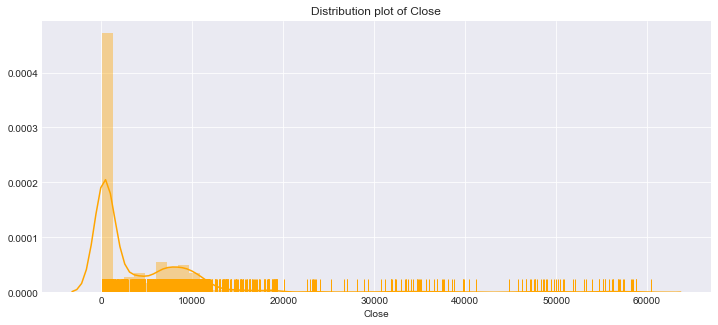

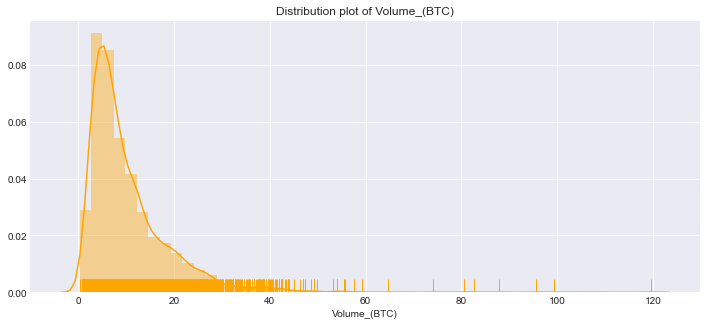

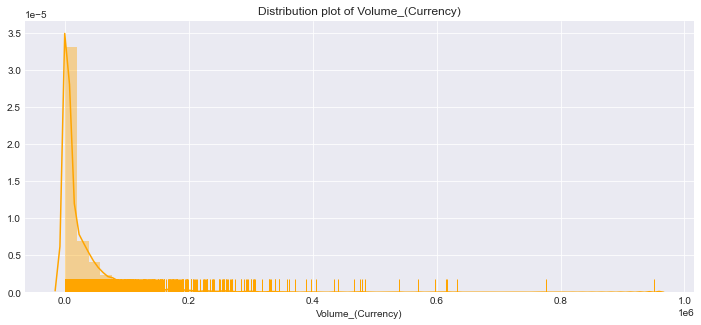

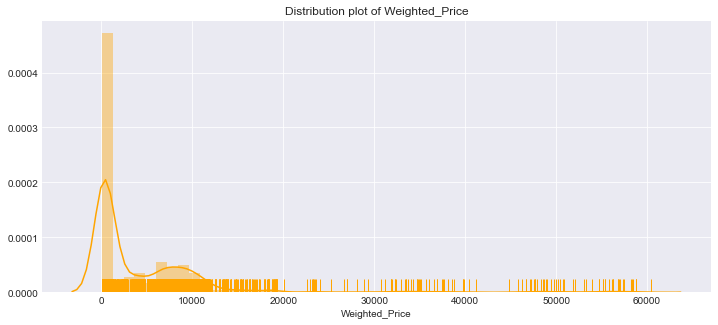

In [26]:
# Plotting distribution plots for all the features.
for x in df.columns:
    plt.figure(figsize=(12,5))
    sns.distplot(df[x], kde = True, rug= True, hist = True, bins=50, color='orange')
    plt.title("Distribution plot of "+ x)

### From the above distribution plots the following inferences can be made:
- From the distribution plots it is clearly evident that the 'Open', 'High', 'Low', 'Close' and 'Weighted_Price' have the same distribution.

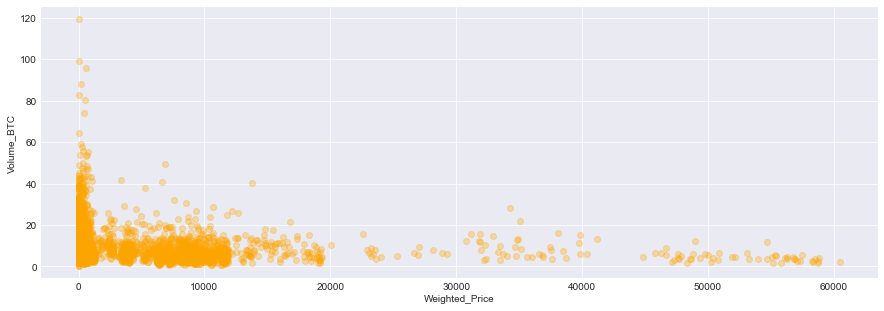

In [27]:
# Scatter plot of Volume_BTC vs Weighted_Price.
plt.figure(figsize=(15,5))
plt.scatter(x=df.Weighted_Price, y =df['Volume_(BTC)'], alpha=0.3, color='orange')
plt.xlabel("Weighted_Price")
plt.ylabel("Volume_BTC")
plt.show()

### From the above Scatter plot the following inferences can be made:
- The Bitcoin volume and price have an inverse relationship.
- We can see that as the price increases the volume decreases.

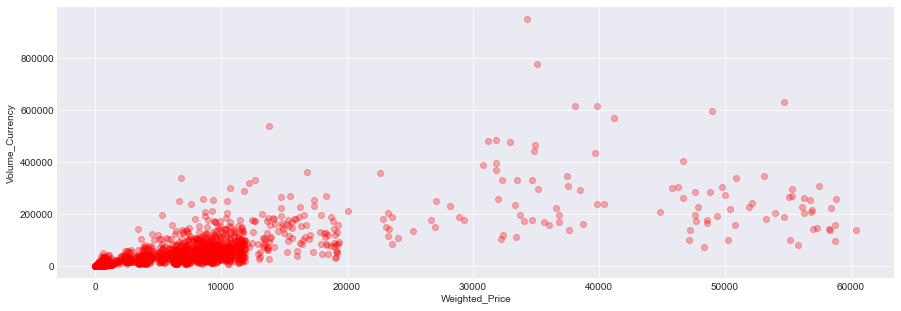

In [28]:
# Scatter plot of Volume_Currency vs Weighted_Price.
plt.figure(figsize=(15,5))
plt.scatter(x=df.Weighted_Price, y =df['Volume_(Currency)'], alpha=0.3, color='red')
plt.xlabel("Weighted_Price")
plt.ylabel("Volume_Currency")
plt.show()

### From the above Scatter plot the following inferences can be made:
- The Bitcoin price and currency volume has a positive correlation.

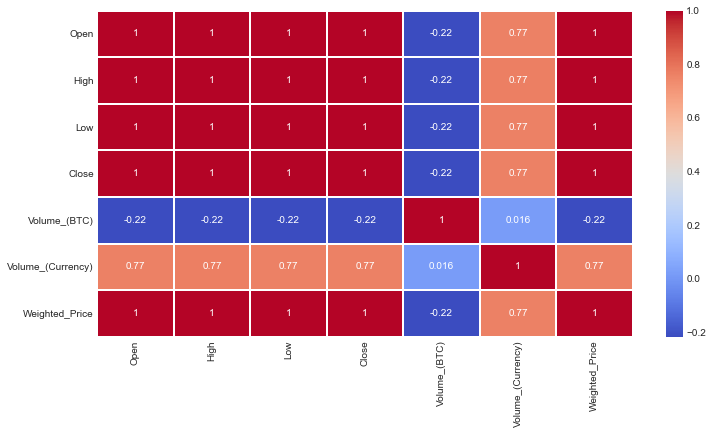

In [29]:
# Visualizing the correlation between the variables.
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(), annot = True ,cmap="coolwarm", linewidths=1, linecolor='white')
plt.show()

### From the above Heat map the following inferences can be made:
- From the above heatmap we can conclude that  'Open', 'High', 'Low', 'Close' and 'Weighted_Price' consists of the same values since they have 1 correlation.

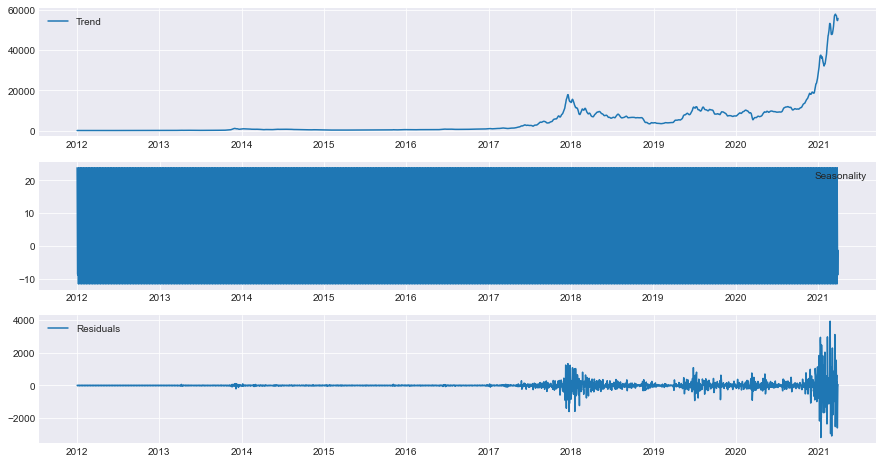

In [30]:
# Plotting decomposed plots to observe trend, seasonality and residuals.
decomposed= seasonal_decompose(df.Weighted_Price)

Trend=decomposed.trend
Seasonality=decomposed.seasonal
Residuals=decomposed.resid

plt.figure(figsize=(15,8))
plt.subplot(3,1,1)
plt.plot(Trend, label='Trend')
plt.legend(loc='best')
plt.subplot(3,1,2)
plt.plot(Seasonality, label='Seasonality')
plt.legend(loc='best')
plt.subplot(3,1,3)
plt.plot(Residuals, label='Residuals')
plt.legend(loc='best')
plt.show()

### From the above decomposed plots the following inferences can be made:
- No Seasonality is observed from the decomposition. 
- There is no constant mean, variance and covariance, hence the series is Non Stationary. 
- We shall perform ADF to confirm our understanding.

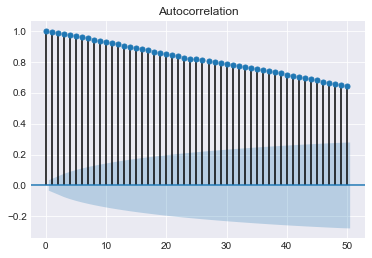

In [31]:
# Plotting Autocorrelation graph
df_acf=plot_acf(df.Weighted_Price.dropna(), lags=50)

- The influence barely deteriorates with time, as indicated in the graph above, therefore historical values have had an impact on current ones. The more lags we add, the better our model fits the dataset; nevertheless, there is a risk that the coefficients would overfit the dataset, leading in overfitting. Only those lags in our model that have a direct impact on our present value are included in our model.

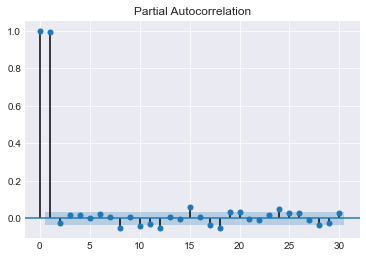

In [32]:
# Plotting Partial Autocorrelation graph
df_pacf=plot_pacf(df.Weighted_Price.dropna(), lags=30)

- Except for a few spikes, coefficient values for lag>5 are statistically insignificant and have no impact on the model.

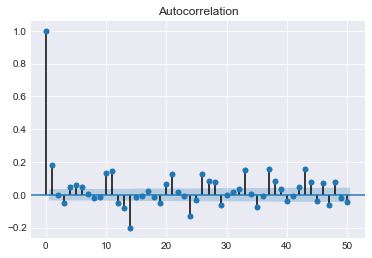

In [33]:
# Plotting Autocorrelation graph for differenced data.
df_acf=plot_acf(df.Weighted_Price.diff().dropna(), lags=50)

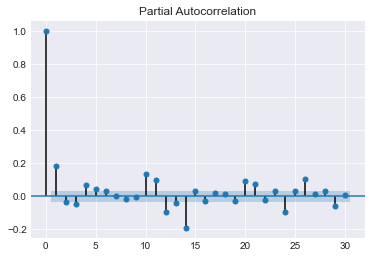

In [34]:
# Plotting Partial Autocorrelation graph for differenced data.
df_pacf=plot_pacf(df.Weighted_Price.diff().dropna(), lags=30)

In [35]:
# Developing a function to perform augmented dickyfuller test.
def dickyfullertest(data):
    result=sm.tsa.stattools.adfuller(data)
    print('ADF-Statistics: {}'.format(result[0]))
    print('p-value : {}'.format(result[1]))
    if result[1]<0.05:
        print('Rejects the Null Hypothesis (H0) which signifies that the data is stationary.')
    else:
        print('Fail to reject the Null Hypothesis (H0) which signifies that the data has a unit root and is non-stationary.')

In [36]:
dickyfullertest(df.Weighted_Price.dropna())

ADF-Statistics: 6.188557009644112
p-value : 1.0
Fail to reject the Null Hypothesis (H0) which signifies that the data has a unit root and is non-stationary.


In [37]:
# Performing defferencing to make the data stationary.
dickyfullertest(df.Weighted_Price.diff().dropna())

ADF-Statistics: -9.090431275873497
p-value : 3.8374423781023705e-15
Rejects the Null Hypothesis (H0) which signifies that the data is stationary.


# Feature Engineering

- The raw data gathered is useful for learning about Bitcoin transactions in the market, but this data can be noisy due to high fluctuations in the market. As a result, it becomes difficult to gauge a trend or pattern in the data. 
- As a result, we can examine the raw data to extract a set of parameters that will help us with our research. The set of features are called Technical Indicators. They are mathematical calculations used to forecast price movement based on past data for a particular asset. 
- Lets consider moving average with time period of 3, 7 and 30 days. It works by simply splitting and aggregating the data into windows according to function, such as mean(), median(), count(). 
- The standard deviation for 3,7 and 30 days period has been computed.
- Also the weighted moving average for 3,7 and 30 days has been computed.
- The Moving average convergence divergence MACD is also found by subtracting EWM12 and EWM26.
- The signal line (9 day ema of macd line) is also calculated. 
- A bullish crossover occurs when the MACD turns up and crosses above the signal line. A bearish crossover occurs when the MACD turns down and crosses below the signal line.

In [38]:
# Feature extraction.
df.reset_index(drop=False, inplace=True)
lag_features = ["Open", "High", "Low", "Close","Volume_(BTC)"]
win1=3
win2=7
win3=30
df_rolling3d=df[lag_features].rolling(window=win1, min_periods=0)
df_rolling7d=df[lag_features].rolling(window=win2, min_periods=0)
df_rolling30d=df[lag_features].rolling(window=win3, min_periods=0)

df_mean3d = df_rolling3d.mean().shift(1).reset_index()
df_mean7d = df_rolling7d.mean().shift(1).reset_index()
df_mean30d = df_rolling30d.mean().shift(1).reset_index()

df_std3d = df_rolling3d.std().shift(1).reset_index()
df_std7d = df_rolling7d.std().shift(1).reset_index()
df_std30d = df_rolling30d.std().shift(1).reset_index()

df_ema3d=df[lag_features].ewm(span=3).mean()
df_ema7d=df[lag_features].ewm(span=7).mean()
df_ema30d=df[lag_features].ewm(span=30).mean()

exp1 = df[lag_features].ewm(span=12, adjust=False).mean()
exp2 = df[lag_features].ewm(span=26, adjust=False).mean()
df_macd= exp1 - exp2
df_signal = df_macd.ewm(span=9, adjust=False).mean()

for feature in lag_features:
    df["{0}_mean_lag{1}".format(feature,win1)] = df_mean3d[feature]
    df["{0}_mean_lag{1}".format(feature,win2)] = df_mean7d[feature]
    df["{0}_mean_lag{1}".format(feature,win3)] = df_mean30d[feature]
    
    df["{0}_std_lag{1}".format(feature,win1)] = df_std3d[feature]
    df["{0}_std_lag{1}".format(feature,win2)] = df_std7d[feature]
    df["{0}_std_lag{1}".format(feature,win3)] = df_std30d[feature]
    
    df["{0}_ewm{1}".format(feature,win1)] = df_ema3d[feature]
    df["{0}_ewm{1}".format(feature,win2)] = df_ema7d[feature]
    df["{0}_ewm{1}".format(feature,win3)] = df_ema30d[feature]
    
    df['{0}_macd'.format(feature)]= df_macd[feature]
    df['{0}_signal'.format(feature)]= df_signal[feature]

df.fillna(df.mean(), inplace=True)

df.set_index("Timestamp", drop=False, inplace=True)
df.head()

Timestamp      Open      High       Low     Close  Volume_(BTC)  \
Timestamp                                                                     
2011-12-31 2011-12-31  4.465000  4.482500  4.465000  4.482500     23.829470   
2012-01-01 2012-01-01  4.806667  4.806667  4.806667  4.806667      7.200667   
2012-01-02 2012-01-02  5.000000  5.000000  5.000000  5.000000     19.048000   
2012-01-03 2012-01-03  5.252500  5.252500  5.252500  5.252500     11.004660   
2012-01-04 2012-01-04  5.200000  5.223333  5.200000  5.223333     11.914807   

            Volume_(Currency)  Weighted_Price  Open_mean_lag3  Open_mean_lag7  \
Timestamp                                                                       
2011-12-31         106.330084        4.471603     4568.641000     4535.780373   
2012-01-01          35.259720        4.806667        4.465000        4.465000   
2012-01-02          95.240000        5.000000        4.635833        4.635833   
2012-01-03          58.100651        5.252500        4.757222        4.757222   
2012-01-04          63.119577        5.208159        5.019722        4.881042   

            ...  Volume_(BTC)_mean_lag7  Volume_(BTC)_mean_lag30  \
Timestamp   ...                                                    
2011-12-31  ...               10.396475                10.415741   
2012-01-01  ...               23.829470                23.829470   
2012-01-02  ...               15.515068                15.515068   
2012-01-03  ...               16.692712                16.692712   
2012-01-04  ...               15.270699                15.270699   

            Volume_(BTC)_std_lag3  Volume_(BTC)_std_lag7  \
Timestamp                                                  
2011-12-31               3.645956               4.427689   
2012-01-01               3.645956               4.427689   
2012-01-02              11.758339              11.758339   
2012-01-03               8.560947               8.560947   
2012-01-04               6.048760               7.546413   

            Volume_(BTC)_std_lag30  Volume_(BTC)_ewm3  Volume_(BTC)_ewm7  \
Timestamp                                                                  
2011-12-31                5.464844          23.829470          23.829470   
2012-01-01                5.464844          12.743601          14.327296   
2012-01-02               11.758339          16.346115          16.368682   
2012-01-03                8.560947          13.497339          14.406982   
2012-01-04                7.546413          12.680548          13.590085   

            Volume_(BTC)_ewm30  Volume_(BTC)_macd  Volume_(BTC)_signal  
Timestamp                                                               
2011-12-31           23.829470           0.000000             0.000000  
2012-01-01           15.237921          -1.326514            -0.265303  
2012-01-02           16.593525          -1.405603            -0.493363  
2012-01-03           15.053589          -2.093182            -0.813327  
2012-01-04           14.339440          -2.535426            -1.157746  

[5 rows x 63 columns]

- The key benefits of calculating a moving average or using this rolling mean method is that our data becomes a lot less noisy and more reflective of the trend than the data itself.

In [39]:
# Extracting some more useful features using the timestamp column.
df["month"] = df.Timestamp.dt.month
df["week"] = df.Timestamp.dt.week
df["day"] = df.Timestamp.dt.day
df["day_of_week"] = df.Timestamp.dt.dayofweek
df.head()

Timestamp      Open      High       Low     Close  Volume_(BTC)  \
Timestamp                                                                     
2011-12-31 2011-12-31  4.465000  4.482500  4.465000  4.482500     23.829470   
2012-01-01 2012-01-01  4.806667  4.806667  4.806667  4.806667      7.200667   
2012-01-02 2012-01-02  5.000000  5.000000  5.000000  5.000000     19.048000   
2012-01-03 2012-01-03  5.252500  5.252500  5.252500  5.252500     11.004660   
2012-01-04 2012-01-04  5.200000  5.223333  5.200000  5.223333     11.914807   

            Volume_(Currency)  Weighted_Price  Open_mean_lag3  Open_mean_lag7  \
Timestamp                                                                       
2011-12-31         106.330084        4.471603     4568.641000     4535.780373   
2012-01-01          35.259720        4.806667        4.465000        4.465000   
2012-01-02          95.240000        5.000000        4.635833        4.635833   
2012-01-03          58.100651        5.252500        4.757222        4.757222   
2012-01-04          63.119577        5.208159        5.019722        4.881042   

            ...  Volume_(BTC)_std_lag30  Volume_(BTC)_ewm3  Volume_(BTC)_ewm7  \
Timestamp   ...                                                                 
2011-12-31  ...                5.464844          23.829470          23.829470   
2012-01-01  ...                5.464844          12.743601          14.327296   
2012-01-02  ...               11.758339          16.346115          16.368682   
2012-01-03  ...                8.560947          13.497339          14.406982   
2012-01-04  ...                7.546413          12.680548          13.590085   

            Volume_(BTC)_ewm30  Volume_(BTC)_macd  Volume_(BTC)_signal  month  \
Timestamp                                                                       
2011-12-31           23.829470           0.000000             0.000000     12   
2012-01-01           15.237921          -1.326514            -0.265303      1   
2012-01-02           16.593525          -1.405603            -0.493363      1   
2012-01-03           15.053589          -2.093182            -0.813327      1   
2012-01-04           14.339440          -2.535426            -1.157746      1   

            week  day  day_of_week  
Timestamp                           
2011-12-31    52   31            5  
2012-01-01    52    1            6  
2012-01-02     1    2            0  
2012-01-03     1    3            1  
2012-01-04     1    4            2  

[5 rows x 67 columns]

## Auto Regressive Integrated Moving Average (ARIMA) Model Implementation

In [40]:
# Splitting the data into train and test data.
df_train = df[df.Timestamp < "2020"]
df_test = df[df.Timestamp >= "2020"]

print('train shape :', df_train.shape)
print('test shape :', df_test.shape)

train shape : (2923, 67)
test shape : (456, 67)


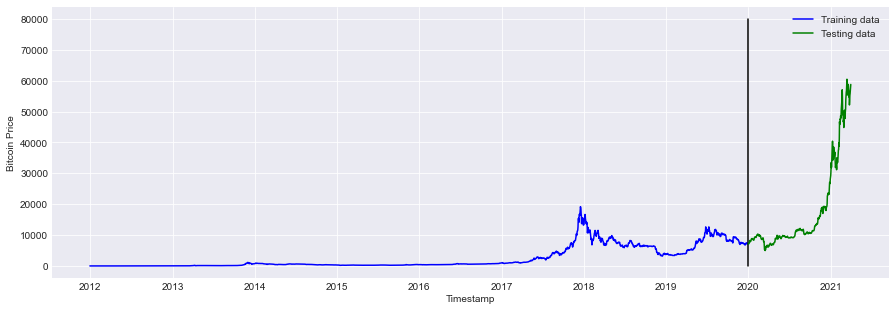

In [41]:
# Visualizing the split train and test data.
from datetime import datetime
plt.figure(figsize=(15,5))
plt.plot(df_train.Weighted_Price, color='blue', label='Training data')
plt.plot([datetime(2020,1, 1), datetime(2020, 1, 1)], [0, 80000], 'black')
plt.plot(df_test.Weighted_Price, color='green', label='Testing data')
plt.xlabel('Timestamp')
plt.ylabel('Bitcoin Price')
plt.legend(loc='best')
plt.show()

In [42]:
# Creating a list of exogenous or exemplary features.
exogenous_features = ['Open_mean_lag3',
       'Open_mean_lag7', 'Open_mean_lag30', 'Open_std_lag3', 'Open_std_lag7',
       'Open_std_lag30', 'High_mean_lag3', 'High_mean_lag7', 'High_mean_lag30',
       'High_std_lag3', 'High_std_lag7', 'High_std_lag30', 'Low_mean_lag3',
       'Low_mean_lag7', 'Low_mean_lag30', 'Low_std_lag3', 'Low_std_lag7',
       'Low_std_lag30', 'Close_mean_lag3', 'Close_mean_lag7',
       'Close_mean_lag30', 'Close_std_lag3', 'Close_std_lag7',
       'Close_std_lag30', 'Volume_(BTC)_mean_lag3', 'Volume_(BTC)_mean_lag7',
       'Volume_(BTC)_mean_lag30', 'Volume_(BTC)_std_lag3',
       'Volume_(BTC)_std_lag7', 'Volume_(BTC)_std_lag30', 'Open_ewm3','Open_ewm7','Open_ewm30',
       'High_ewm3','High_ewm7','High_ewm30','Low_ewm3','Low_ewm7','Low_ewm30',
       'Close_ewm3', 'Close_ewm7', 'Close_ewm30',
       'Volume_(BTC)_ewm3', 'Volume_(BTC)_ewm7', 'Volume_(BTC)_ewm30', 
       'Open_macd', 'Close_macd', 'High_macd' , 'Low_macd', 'Volume_(BTC)_macd',
       'Open_signal', 'Close_signal', 'High_signal', 'Low_signal', 'Volume_(BTC)_signal',
       'month', 'week','day', 'day_of_week']

### ARIMA model (Without exogenous features)

In [43]:
# Leveraging Auto Arima to find the optimal parameters(p,d and q).
model1=pm.auto_arima(df_train.Weighted_Price,  trace=True, 
                     error_action="ignore", 
                     suppress_warnings=True)
# Fitting the ARIMA model based on train data.
model1.fit(df_train.Weighted_Price)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=38682.255, Time=1.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=38823.443, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=38713.471, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=38717.948, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=38821.958, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=38680.588, Time=1.38 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=38713.890, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=38715.420, Time=0.17 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=38682.304, Time=1.66 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=38712.246, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=38717.465, Time=0.36 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=38683.860, Time=3.57 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=38678.854, Time=0.63 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=38712.223, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [44]:
# Predicting for the train dataset.
df_train['ARIMA forecast(without exogenous features)']=model1.predict(n_periods=len(df_train))

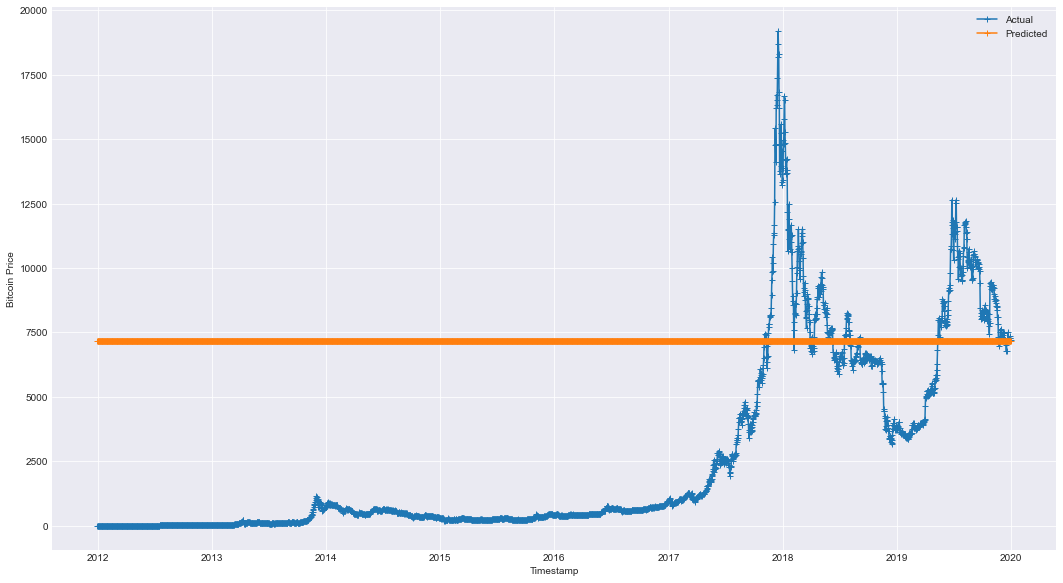

In [45]:
# Plotting the prediction vs train dataset values.
plt.figure(figsize=(18,10))
plt.plot(df_train['Weighted_Price'], label='Actual', marker='+')
plt.plot(df_train['ARIMA forecast(without exogenous features)'], marker='+',  label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

### From the above plot the following inferences can be made:
- Its clearly evident that the model is not able to predict the price well and hence has predicted a straight line.
- This shows us that the ARIMA model might not be capable of predicting for long term.

In [46]:
# Evaluating the prediciton using RMSE, MAE and R2 score.
print('Root Mean Square Error:', mean_squared_error(df_train['Weighted_Price'], df_train['ARIMA forecast(without exogenous features)'], squared=False).round(2))
print('Mean Absolute Error:', mean_absolute_error(df_train['Weighted_Price'], df_train['ARIMA forecast(without exogenous features)']).round(2))
print('R-Squared', r2_score(df_train['Weighted_Price'], df_train['ARIMA forecast(without exogenous features)']).round(2))

Root Mean Square Error: 5858.3
Mean Absolute Error: 5372.4
R-Squared -1.66


- We get poor results from the evaluation metrics for the train data.

In [47]:
# Predicting on the train data.
df_test['ARIMA forecast(without exogenous features)']=model1.predict(n_periods=len(df_test))

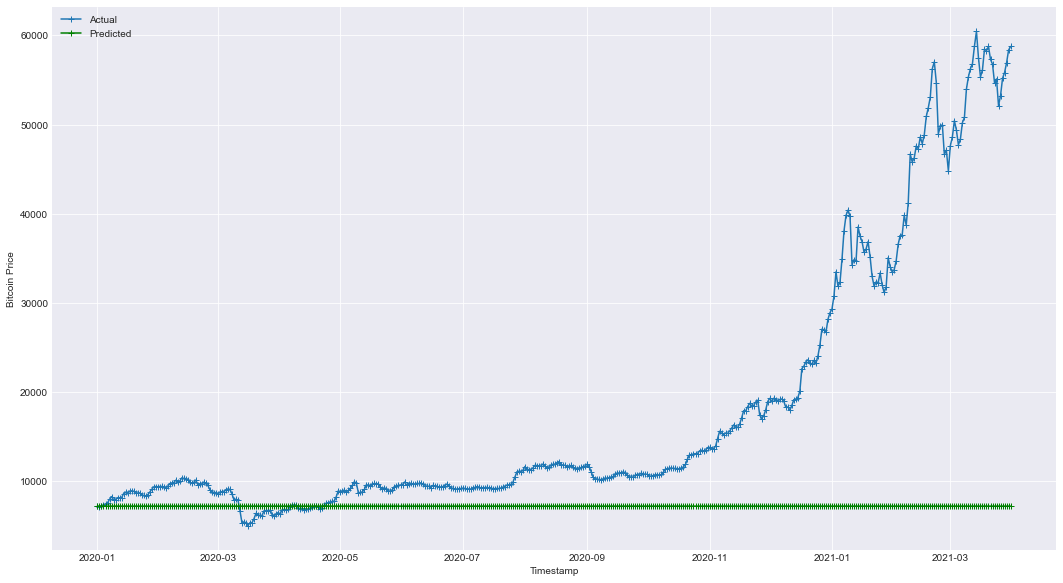

In [48]:
# Plotting the prediction vs test dataset values.
plt.figure(figsize=(18,10))
plt.plot(df_test['Weighted_Price'], label='Actual', marker='+')
plt.plot(df_test['ARIMA forecast(without exogenous features)'], marker='+',  label='Predicted', color='green')
plt.xlabel('Timestamp')
plt.ylabel('Bitcoin Price')
plt.legend(loc='best')
plt.show()

### From the above plot the following inferences can be made:
- The ARIMA model has predicted a straight line for test data as well.
- This was fairly obvious since it could not predict well for the train data.

In [49]:
# Evaluating the prediciton using RMSE, MAE and R2 score.
print('Root Mean Square Error:', mean_squared_error(df_test['Weighted_Price'], df_test['ARIMA forecast(without exogenous features)'], squared=False).round(2))
print('Mean Absolute Error:', mean_absolute_error(df_test['Weighted_Price'], df_test['ARIMA forecast(without exogenous features)']).round(2))
print('R-Squared', r2_score(df_test['Weighted_Price'], df_test['ARIMA forecast(without exogenous features)']).round(2))

Root Mean Square Error: 18100.25
Mean Absolute Error: 10733.46
R-Squared -0.52


- The ARIMA model is providing poor results, lets try to predict one day at a time, where the model is updated based on the day by day results.


In [50]:
# Emplying Auto arima to find the optimal parameters(p,d and q).
model2=pm.auto_arima(df_train.Weighted_Price,  trace=True, 
                     error_action="ignore", 
                     suppress_warnings=True)
# Fitting the model based on train data.
model2.fit(df_train.Weighted_Price)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=38682.255, Time=1.76 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=38823.443, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=38713.471, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=38717.948, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=38821.958, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=38680.588, Time=1.42 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=38713.890, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=38715.420, Time=0.17 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=38682.304, Time=1.61 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=38712.246, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=38717.465, Time=0.36 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=38683.860, Time=3.79 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=38678.854, Time=0.62 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=38712.223, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [51]:
# Developing a function to forecast the next day price using the previous day price.
def forecast_one_step():
    forecast, conf_int = model2.predict(n_periods=1, return_conf_int=True)
    return (
        forecast.tolist()[0],
        np.asarray(conf_int).tolist()[0])

y_pred = []
y_confidence = []

for i, new_ob in enumerate(df_test.Weighted_Price):
# Implementing the function
    fc, conf = forecast_one_step()
# Appending the preditions to 'y_pred'
    y_pred.append(fc)
# Appending the confidence intervals to 'y_confidence'
    y_confidence.append(conf)
# Printing the output
    print(i, fc, new_ob, abs(fc - new_ob))
# Updating the model with everytime it predicts the next day price.
    model2.update(new_ob)

0 7170.144762934606 7195.811552696488 25.666789761882683
1 7205.639522502298 7072.477633719385 133.16188878291268
2 7041.3888841446005 7218.040866931673 176.65198278707248
3 7253.285966357288 7321.919470839411 68.63350448212259
4 7343.943652314492 7430.027209611784 86.08355729729192
5 7443.218145998462 7533.920318682511 90.70217268404849
6 7560.3595526608015 7929.897113517012 369.5375608562108
7 8003.4053322588625 8235.623274372892 232.21794211402994
8 8300.939138254125 7898.569229036512 402.369909217613
9 7807.185213936572 7888.135214954424 80.95000101785172
10 7897.769411277704 8113.36082587181 215.59141459410603
11 8168.065179319553 8111.715362809299 56.34981651025373
12 8098.489497252775 8102.893845324083 4.40434807130714
13 8103.203829601382 8574.611704362773 471.4078747613912
14 8674.042055438587 8743.692143647299 69.65008820871117
15 8774.006959988637 8674.415975438425 99.59098455021194
16 8641.284318978698 8852.804577276258 211.52025829755985
17 8905.042828837375 8891.817032065

281 10597.525178381113 10734.447340398325 136.92216201721203
282 10768.571049933313 10983.384095603922 214.81304567060943
283 11032.702145310685 11334.302728770823 301.6005834601383
284 11407.860994590383 11360.626362271316 47.234632319066804
285 11353.635801194076 11447.596319805223 93.96051861114756
286 11463.990244345507 11450.011132570118 13.979111775388446
287 11454.11370445421 11405.501558826803 48.61214562740679
288 11387.289878808764 11415.065075223158 27.775196414393577
289 11426.717550557827 11364.835083056 61.882467501827705
290 11346.594930797619 11343.749377836299 2.845552961320209
291 11345.317712113676 11424.963448037346 79.64573592367014
292 11440.786265740911 11587.264630524502 146.47836478359022
293 11624.710915000725 11845.688666804634 220.97775180390818
294 11895.816282376403 12458.755897932593 562.9396155561899
295 12592.797355551156 12933.452571687387 340.6552161362306
296 13021.599114134213 12933.337158049088 88.26195608512535
297 12913.219363878334 13030.4059350

419 54105.27378848264 48968.837945908424 5136.4358425742175
420 47601.654451037844 49800.28486888126 2198.6304178434148
421 50097.31454570668 49985.23481495351 112.0797307531684
422 50114.48835690986 46655.920048518725 3458.5683083911354
423 45851.34151160744 47130.208060158875 1278.8665485514357
424 47363.020498806596 44818.44755210362 2544.572946702974
425 44290.90634510555 47641.53689948156 3350.63055437601
426 48162.452193993 48617.28932090135 454.8371269083509
427 48768.93327032063 50429.44901579067 1660.5157454700384
428 50618.56261897256 49398.2503985708 1220.3122204017563
429 49298.36551475432 47717.64330027977 1580.7222144745465
430 47366.31050714905 48371.54353797001 1005.2330308209566
431 48574.53181898953 50218.21680438112 1643.6849853915846
432 50548.31825425196 50798.35421240729 250.0359581553348
433 50872.16431886875 53980.847261679024 3108.682942810272
434 54579.17182408424 55375.36624125794 796.194417173705
435 55608.711758232996 56272.596972013926 663.8852137809299
43

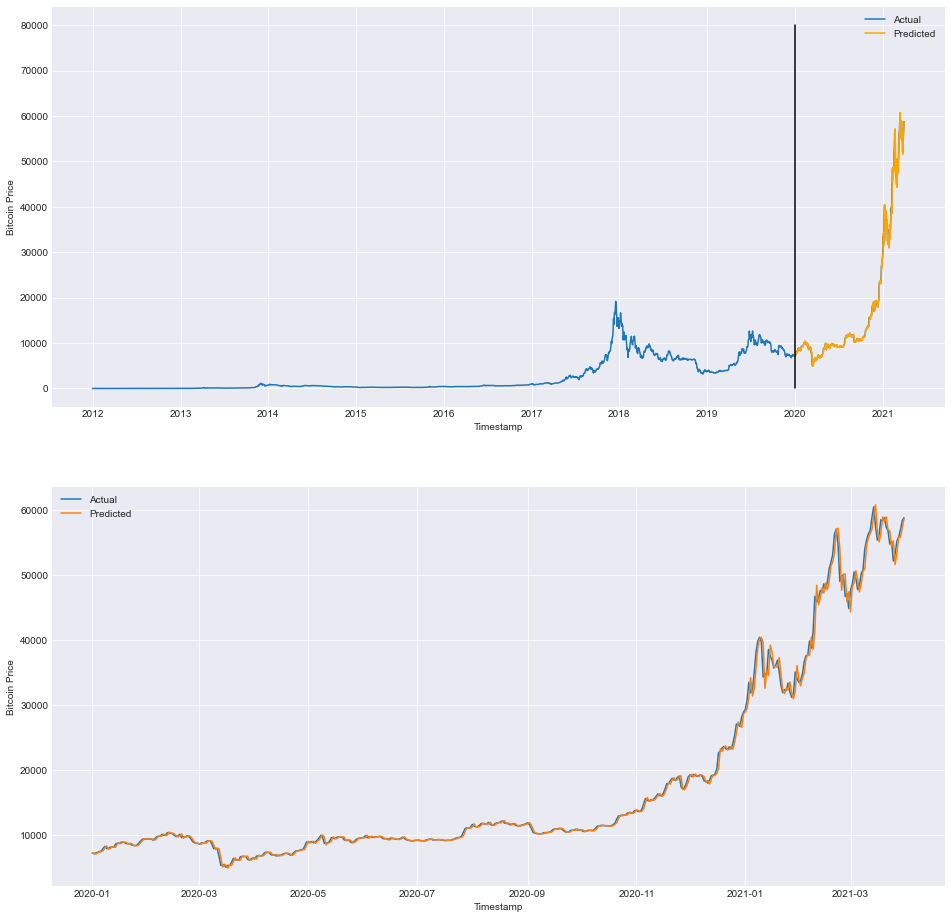

In [52]:
# Plotting the actual and predicted values.
plt.figure(figsize=(16,25))
plt.subplot(3,1,1)
plt.plot(df.index, df.Weighted_Price, label='Actual')
plt.xlabel('Timestamp')
plt.ylabel('Bitcoin Price')
plt.plot(df_test.index, y_pred, label='Predicted', color='orange')
plt.plot([datetime(2020,1, 1), datetime(2020, 1, 1)], [0, 80000], 'black')
plt.legend()
# Plotting the prediction vs test dataset values.
plt.subplot(3,1,2)
plt.plot(df_test.index, df_test.Weighted_Price, label='Actual')
plt.plot(df_test.index, y_pred, label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Bitcoin Price')
plt.legend(loc='upper left')
plt.show()

### From the above plots the following inferences can be made:
- The ARIMA model is predicting farily well for the short term as we can see from the plots above.

In [53]:
# Evaluating the prediciton using RMSE, MAE and R2 score.
print('Root Mean Square Error:', mean_squared_error(df_test['Weighted_Price'], y_pred, squared=False).round(2))
print('Mean Absolute Error:', mean_absolute_error(df_test['Weighted_Price'], y_pred).round(2))
print('R-Squared', r2_score(df_test['Weighted_Price'], y_pred).round(3))

Root Mean Square Error: 891.42
Mean Absolute Error: 459.6
R-Squared 0.996


- The ARIMA model is able to predict the price decently well, only when the data is provided till the previous day.
- The RMSE and MAE values are low, and we obtain a good R2 score of 0.996.
- Therefore we can say it predicts fairly well in the shorter timeframes.

### ARIMAX Model

In [54]:
# Leveraging Auto Arima to find the optimal parameters(p,d and q).
model=pm.auto_arima(df_train.Weighted_Price, exogenous=df_train[exogenous_features], trace=True, 
                    error_action="ignore", suppress_warnings=True)
# Fitting the model based on train data.
model.fit(df_train.Weighted_Price,  exogenous=df_train[exogenous_features])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=27664.399, Time=64.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=27943.660, Time=4.70 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=27917.530, Time=56.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=27894.213, Time=62.00 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=47324.159, Time=20.91 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=27675.451, Time=122.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=27672.460, Time=80.05 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=27970.394, Time=41.97 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=27618.573, Time=16.15 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=27611.565, Time=16.90 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=27661.420, Time=130.03 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=27603.702, Time=32.69 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=27633.504, Time=100.81 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=27613.885, Time=15.64 sec
 AR

ARIMA(order=(4, 0, 5), scoring_args={}, suppress_warnings=True)

In [55]:
# Predicting on the train data.
df_train['ARIMAX forecast']=model.predict(n_periods=len(df_train), exogenous= df_train[exogenous_features])

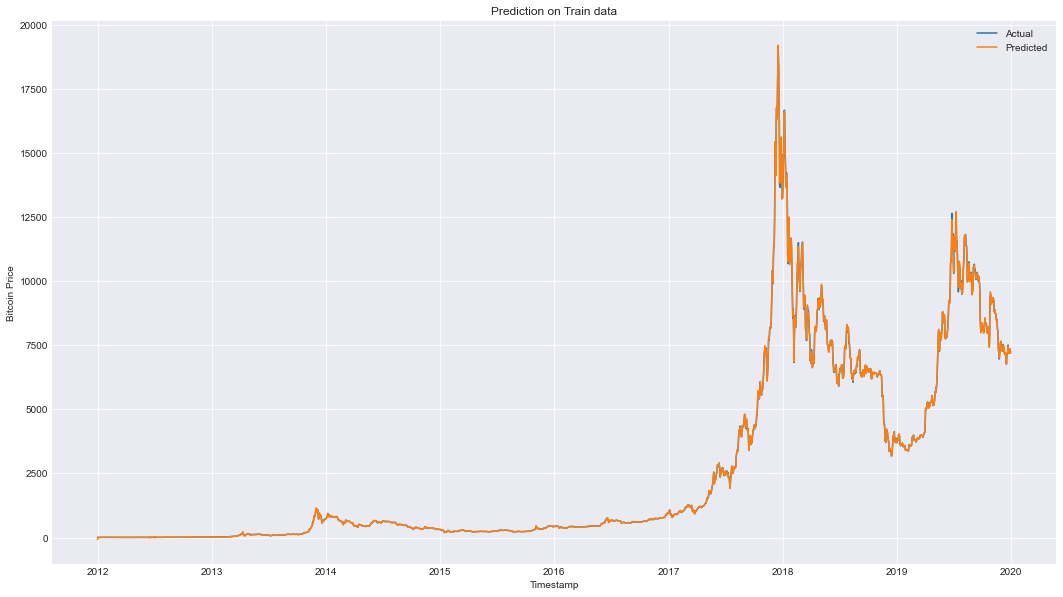

In [56]:
# Plotting the prediction vs train dataset values.
plt.figure(figsize=(18,10))
plt.plot(df_train['Weighted_Price'], label='Actual')
plt.plot(df_train['ARIMAX forecast'],  label='Predicted')
plt.title('Prediction on Train data')
plt.xlabel('Timestamp')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

### From the above plot the following inferences can be made:
- The ARIMAX model is predicting outstandingly well for the train data.
- The prediction and actual plots are almost coinciding, which is indicative of high accuracy.

In [57]:
# Evaluating the prediciton using RMSE, MAE and R2 score.
print('Mean Absolute Error:', mean_absolute_error(df_train['Weighted_Price'], df_train['ARIMAX forecast']).round(2))
print('Root Mean Square Error:', mean_squared_error(df_train['Weighted_Price'], df_train['ARIMAX forecast'], squared=False).round(2))
print('R-Squared', r2_score(df_train['Weighted_Price'], df_train['ARIMAX forecast']).round(4))

Mean Absolute Error: 12.27
Root Mean Square Error: 28.28
R-Squared 0.9999


- We get exceptionally high R2 Score of 0.9999 and also very low RMSE and MAE values.

In [58]:
# Predicting on the test data.
df_test['ARIMAX forecast']=model.predict(n_periods=len(df_test), exogenous= df_test[exogenous_features])

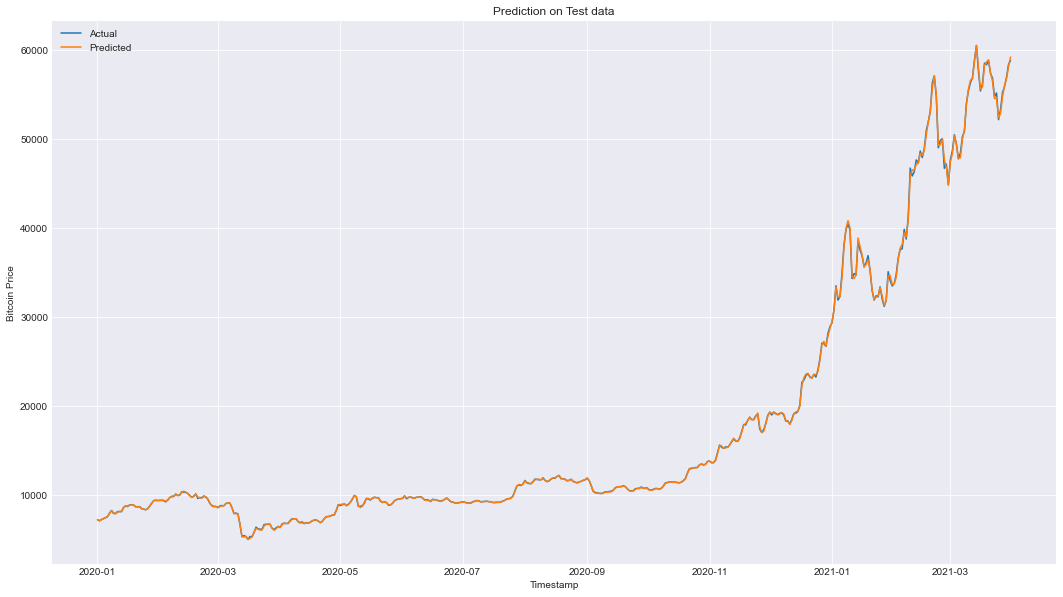

In [59]:
# Plotting the prediction vs test dataset values.
plt.figure(figsize=(18,10))
plt.plot(df_test['Weighted_Price'], label='Actual')
plt.plot(df_test['ARIMAX forecast'], label='Predicted')
plt.title('Prediction on Test data')
plt.xlabel('Timestamp')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

In [60]:
# Evaluating the prediciton using RMSE, MAE and R2 score.
print('Root Mean Square Error:', mean_squared_error(df_test['Weighted_Price'], df_test['ARIMAX forecast'], squared=False).round(2))
print('Mean Absolute Error:', mean_absolute_error(df_test['Weighted_Price'], df_test['ARIMAX forecast']).round(2))
print('R-Squared', r2_score(df_test['Weighted_Price'], df_test['ARIMAX forecast']).round(4))

Root Mean Square Error: 154.19
Mean Absolute Error: 83.79
R-Squared 0.9999


- As we can see, the ARIMAX model is performing exeptionally well in predicting the bitcoin price.

# Long Short Term Memory (LSTM) Model


In [71]:
# Creating a nee dataframe for the lstm model.
df_lstm=pd.read_csv("C:\\Users\\shrey\\OneDrive\\Desktop\\Research\\bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")

In [72]:
df_lstm.head()

Timestamp  Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1325317920  4.39  4.39  4.39   4.39      0.455581                2.0   
1  1325317980   NaN   NaN   NaN    NaN           NaN                NaN   
2  1325318040   NaN   NaN   NaN    NaN           NaN                NaN   
3  1325318100   NaN   NaN   NaN    NaN           NaN                NaN   
4  1325318160   NaN   NaN   NaN    NaN           NaN                NaN   

   Weighted_Price  
0            4.39  
1             NaN  
2             NaN  
3             NaN  
4             NaN

In [73]:
#Converting the 'Timestamp' column into 'datetime' data type
df_lstm.Timestamp=pd.to_datetime(df_lstm.Timestamp, unit= 's')

In [74]:
# Setting Timestamp column as our index.
df_lstm=df_lstm.set_index('Timestamp')

In [75]:
# Resampling the data by daily price.
df_lstm=df_lstm.resample('D').mean()

In [76]:
df_lstm.head()

Open      High       Low     Close  Volume_(BTC)  \
Timestamp                                                          
2011-12-31  4.465000  4.482500  4.465000  4.482500     23.829470   
2012-01-01  4.806667  4.806667  4.806667  4.806667      7.200667   
2012-01-02  5.000000  5.000000  5.000000  5.000000     19.048000   
2012-01-03  5.252500  5.252500  5.252500  5.252500     11.004660   
2012-01-04  5.200000  5.223333  5.200000  5.223333     11.914807   

            Volume_(Currency)  Weighted_Price  
Timestamp                                      
2011-12-31         106.330084        4.471603  
2012-01-01          35.259720        4.806667  
2012-01-02          95.240000        5.000000  
2012-01-03          58.100651        5.252500  
2012-01-04          63.119577        5.208159

In [77]:
# Checking for null values in the dataset.
df_lstm[df_lstm.Open.isnull()]

Open  High  Low  Close  Volume_(BTC)  Volume_(Currency)  \
Timestamp                                                             
2015-01-06   NaN   NaN  NaN    NaN           NaN                NaN   
2015-01-07   NaN   NaN  NaN    NaN           NaN                NaN   
2015-01-08   NaN   NaN  NaN    NaN           NaN                NaN   

            Weighted_Price  
Timestamp                   
2015-01-06             NaN  
2015-01-07             NaN  
2015-01-08             NaN

In [78]:
# Replacing null values with mean.
df_lstm.loc['2015-01-06',:]=df_lstm.loc['2015-01-05':'2015-01-09'].mean()
df_lstm.loc['2015-01-07',:]=df_lstm.loc['2015-01-05':'2015-01-09'].mean()
df_lstm.loc['2015-01-08',:]=df_lstm.loc['2015-01-05':'2015-01-09'].mean()

In [79]:
# Checking for null values in the dataset.
df_lstm.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [80]:
len(df_lstm), df_lstm.shape

(3379, (3379, 7))

In [81]:
# Dropping all the columns other than the Weighted-Price.
df_lstm=df_lstm.Weighted_Price

In [82]:
#Preparing the data by giving 10 time steps.
X = [df_lstm[i:i+10] for i in range(len(df_lstm)-11)]
Y = [df_lstm[i+10] for i in range(len(df_lstm)-11)]

In [83]:
X[:2]

[Timestamp
 2011-12-31    4.471603
 2012-01-01    4.806667
 2012-01-02    5.000000
 2012-01-03    5.252500
 2012-01-04    5.208159
 2012-01-05    6.284127
 2012-01-06    6.438999
 2012-01-07    6.800000
 2012-01-08    6.950000
 2012-01-09    6.582770
 Freq: D, Name: Weighted_Price, dtype: float64,
 Timestamp
 2012-01-01    4.806667
 2012-01-02    5.000000
 2012-01-03    5.252500
 2012-01-04    5.208159
 2012-01-05    6.284127
 2012-01-06    6.438999
 2012-01-07    6.800000
 2012-01-08    6.950000
 2012-01-09    6.582770
 2012-01-10    6.603000
 Freq: D, Name: Weighted_Price, dtype: float64]

In [84]:
Y[:2]

[6.602999999999999, 7.120684842337494]

In [85]:
# Splitting the data into train and test.
X_train , X_test, y_train, y_test = train_test_split(X, Y ,train_size=0.865, shuffle = False)

In [86]:
# Converting into NumPy array to reshape as per the requirements of LSTM model.
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [87]:
X_train.shape

(2913, 10)

In [88]:
X_test.shape

(455, 10)

In [89]:
# Reshaping the numpy array as per the requirements of LSTM.
X_train=np.reshape(X_train,(X_train.shape[0], 1 , X_train.shape[1]))
X_test=np.reshape(X_test,(X_test.shape[0], 1 , X_test.shape[1]))
X_test.shape

(455, 1, 10)

In [90]:
X_train.shape

(2913, 1, 10)

### Model parameters:
- Every LSTM layer should be accompanied by a Dropout layer. This layer will help to prevent overfitting by ignoring randomly selected neurons during training, and hence reduces the sensitivity to the specific weights of individual neurons. 20% is often used as a good compromise between retaining model accuracy and preventing overfitting.
- A dense layer is the most frequently used layer which is basically a layer where each neuron receives input from all neurons in the previous layer thus, “densely connected”. Dense layers improve overall accuracy. The output shape of the final dense layer will be affected by the number of neuron / units specified.
- Optimizers in machine learning are used to tune the parameters of a neural network in order to minimize the cost function. Adaptive moment estimation, short _Adam_ seems to be the best choice in general and has been shown to work well in most practical applications 
- The epoch hyperparameter sets how many complete iterations of the dataset is to be run. Theoretically, this number can be set to an integer value between one and infinity, this should be increased until the validation accuracy starts to decrease even though training accuracy increases.

In [91]:
# Building the first LSTM model.
np.random.seed(0)
model3 = Sequential([
    Bidirectional(LSTM(50, activation='relu'), input_shape=(1, 10)),
    Dropout(0.2) , 
    Dense(1) 
])
model3.compile(loss='mse' , optimizer= 'adam')

In [92]:
# Checking the summary of the model.
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 100)              24400     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 24,501
Trainable params: 24,501
Non-trainable params: 0
_________________________________________________________________


In [96]:
# Fitting the model based on train data.
history=model3.fit(X_train, y_train, validation_data = (X_test, y_test) , epochs=30)

Epoch 1/30
92/92 [==============================] - 2s 6ms/step - loss: 3478666.5000 - val_loss: 9258291.0000
Epoch 2/30
92/92 [==============================] - 0s 3ms/step - loss: 636656.6875 - val_loss: 3968830.2500
Epoch 3/30
92/92 [==============================] - 0s 2ms/step - loss: 494280.7188 - val_loss: 2597997.5000
Epoch 4/30
92/92 [==============================] - 0s 2ms/step - loss: 418492.6250 - val_loss: 2661493.5000
Epoch 5/30
92/92 [==============================] - 0s 2ms/step - loss: 443640.7188 - val_loss: 2006479.0000
Epoch 6/30
92/92 [==============================] - 0s 2ms/step - loss: 364884.7812 - val_loss: 4290989.0000
Epoch 7/30
92/92 [==============================] - 0s 2ms/step - loss: 399388.9062 - val_loss: 2167698.0000
Epoch 8/30
92/92 [==============================] - 0s 2ms/step - loss: 354492.6875 - val_loss: 1889560.5000
Epoch 9/30
92/92 [==============================] - 0s 2ms/step - loss: 362821.6250 - val_loss: 2652649.0000
Epoch 10/30
92/92 

In [97]:
# Predicting for train data.
pred_train=model3.predict(X_train)

In [98]:
# Evaluating the prediction using RMSE, MAE and R2 score.
print('Root Mean Square Error:', mean_squared_error(y_train, pred_train, squared=False).round(2))
print('Mean Absolute Error:', mean_absolute_error(y_train, pred_train).round(2))
print('R-Squared', r2_score(y_train, pred_train).round(4))

Root Mean Square Error: 258.91
Mean Absolute Error: 102.76
R-Squared 0.9948


- The LSTM Model is able to predict the bitcoin price fairly well.
- The RMSE and MAE are low, and a good R2 Score is obtained.

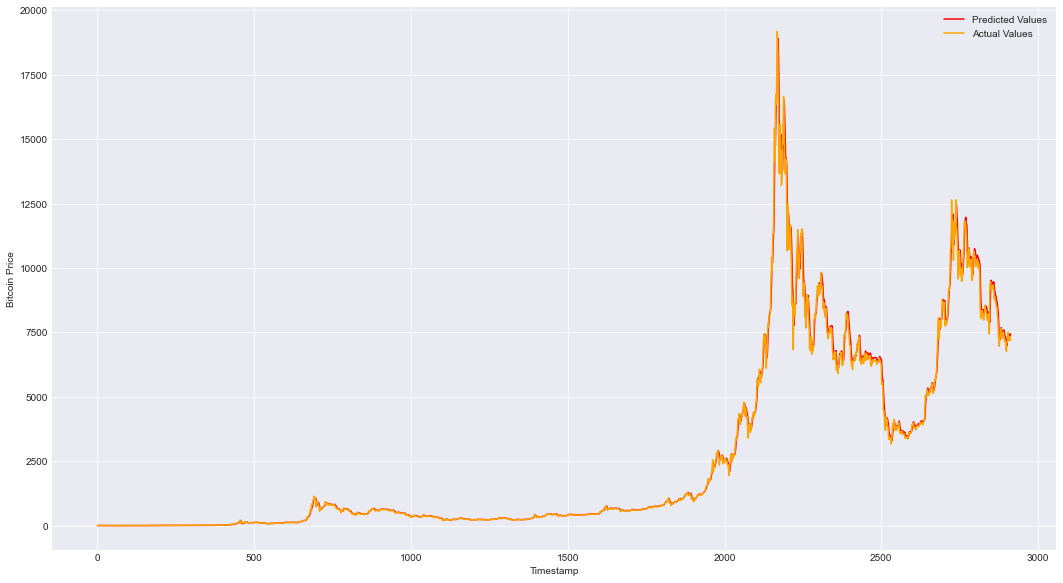

In [99]:
# Plotting the prediction vs train dataset values.
plt.figure(figsize=(18,10))
plt.plot(pred_train, color='red', label='Predicted Values')
plt.plot(y_train ,color='orange', label='Actual Values')
plt.xlabel('Timestamp')
plt.ylabel('Bitcoin Price')
plt.legend(loc='best')
plt.show()

In [100]:
# Predicting for test data.
test_pred=model3.predict(X_test)

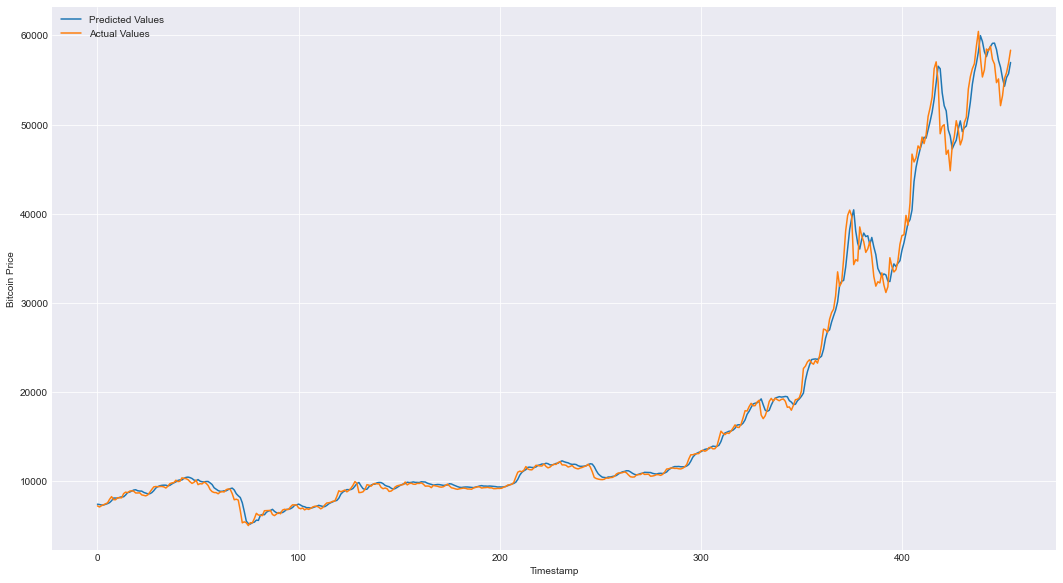

In [101]:
# Plotting the prediction vs test dataset values.
plt.figure(figsize=(18,10))
plt.plot(test_pred, label='Predicted Values')
plt.plot(y_test, label='Actual Values')
plt.xlabel('Timestamp')
plt.ylabel('Bitcoin Price')
plt.legend(loc='best')
plt.show()

In [104]:
# Evaluating the prediction using RMSE, MAE and R2 score.
print('Root Mean Square Error:', mean_squared_error(y_test, test_pred, squared=False).round(2))
print('Mean Absolute Error:', mean_absolute_error(y_test, test_pred).round(2))
print('R-Squared', r2_score(y_test, test_pred).round(3))

Root Mean Square Error: 1124.45
Mean Absolute Error: 605.11
R-Squared 0.994


- The model is able to predict well for the test data as well, with low RSME and MAE.

In [100]:
#Preparing the data by giving 100 time steps.
X1 = [df_lstm[i:i+100] for i in range(len(df_lstm)-101)]
Y1 = [df_lstm[i+100] for i in range(len(df_lstm)-101)]

In [101]:
# Splitting the data into train and test.
X1_train , X1_test, y1_train, y1_test = train_test_split(X1, Y1 ,train_size=0.865, shuffle = False)

- Train size is 0.865 to match the train data considered for the ARIMA models (2012-2019 data).

In [102]:
# Converting into NumPy array to reshape as per the requirements of LSTM model.
X1_train = np.array(X1_train)
X1_test = np.array(X1_test)
y1_train = np.array(y1_train)
y1_test = np.array(y1_test)

In [103]:
# Reshaping the numpy array as per the requirements of LSTM.
X1_train = np.reshape(X1_train, (X1_train.shape[0], 1 , X1_train.shape[1]))
X1_test=np.reshape(X1_test,(X1_test.shape[0], 1 , X1_test.shape[1]))

In [104]:
X1_train.shape

(2835, 1, 100)

In [110]:
# Building the second LSTM model.
np.random.seed(0)
model4 = Sequential([
    Bidirectional(LSTM(64, activation='relu'), input_shape=(1, 100)),
    Dropout(0.2) , 
    Dense(1) 
])
model4.compile(loss='mse' , optimizer= 'adam')

In [111]:
# Fitting the model based on train data.
model4.fit(X1_train, y1_train, epochs=20, validation_data=[X1_test,y1_test])

Epoch 1/20
89/89 [==============================] - 2s 6ms/step - loss: 2698029.5000 - val_loss: 7439155.5000
Epoch 2/20
89/89 [==============================] - 0s 3ms/step - loss: 899572.0625 - val_loss: 4002934.2500
Epoch 3/20
89/89 [==============================] - 0s 3ms/step - loss: 702938.3750 - val_loss: 19458190.0000
Epoch 4/20
89/89 [==============================] - 0s 2ms/step - loss: 628987.1875 - val_loss: 6639188.0000
Epoch 5/20
89/89 [==============================] - 0s 2ms/step - loss: 541843.4375 - val_loss: 3776576.2500
Epoch 6/20
89/89 [==============================] - 0s 2ms/step - loss: 489453.4062 - val_loss: 4239000.5000
Epoch 7/20
89/89 [==============================] - 0s 2ms/step - loss: 630917.9375 - val_loss: 2993899.7500
Epoch 8/20
89/89 [==============================] - 0s 3ms/step - loss: 531619.0625 - val_loss: 5031420.5000
Epoch 9/20
89/89 [==============================] - 0s 2ms/step - loss: 491083.5312 - val_loss: 3478607.5000
Epoch 10/20
89/89

In [112]:
# Predicting for train data.
pred_train1=model4.predict(X1_train)

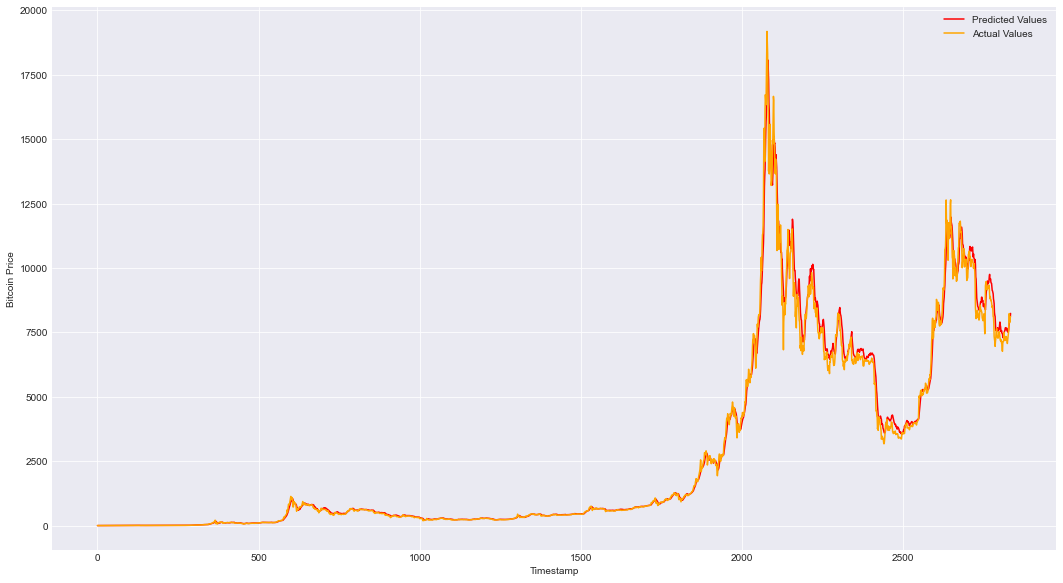

In [113]:
# Plotting the prediction vs train dataset values.
plt.figure(figsize=(18,10))
plt.plot(pred_train1, color='red', label='Predicted Values')
plt.plot(y1_train ,color='orange', label='Actual Values')
plt.xlabel('Timestamp')
plt.ylabel('Bitcoin Price')
plt.legend(loc='best')
plt.show()

In [115]:
# Evaluating the prediction using RMSE, MAE and R2 score.
print('Root Mean Square Error:', mean_squared_error(y1_train, pred_train1, squared=False).round(2))
print('Mean Absolute Error:', mean_absolute_error(y1_train, pred_train1).round(2))
print('R-Squared', r2_score(y1_train, pred_train1).round(3))

Root Mean Square Error: 357.24
Mean Absolute Error: 157.26
R-Squared 0.99


In [116]:
# Predicting for test data.
pred_test1=model4.predict(X1_test)

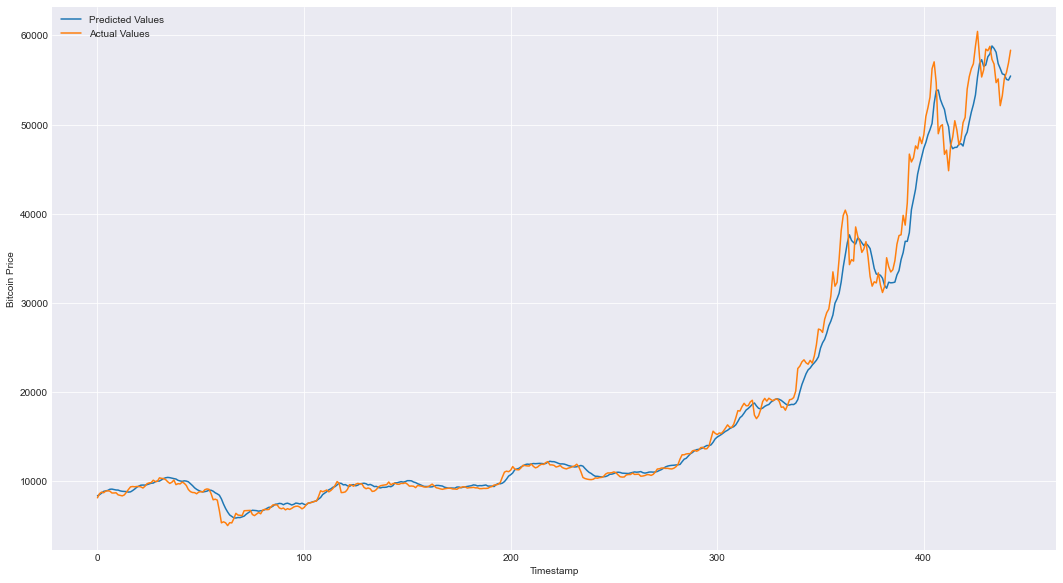

In [117]:
# Plotting the prediction vs test dataset values.
plt.figure(figsize=(18,10))
plt.plot(pred_test1, label='Predicted Values')
plt.plot(y1_test, label='Actual Values')
plt.xlabel('Timestamp')
plt.ylabel('Bitcoin Price')
plt.legend(loc='best')
plt.show()

In [118]:
# Evaluating the prediction using RMSE, MAE and R2 score.
print('Root Mean Square Error:', mean_squared_error(y1_test, pred_test1, squared=False).round(2))
print('Mean Absolute Error:', mean_absolute_error(y1_test, pred_test1).round(2))
print('R-Squared', r2_score(y1_test, pred_test1).round(3))

Root Mean Square Error: 1546.42
Mean Absolute Error: 869.03
R-Squared 0.989


- For 100 timesteps scenario the prediction gets  better as we increase number of epochs as opposed to 10 timesteps scenario.
- For 20 epochs the 10 timestep scenario gave better results.

In [119]:
#Preparing the data by giving 50 time steps.
X2 = [df_lstm[i:i+50] for i in range(len(df_lstm)-51)]
Y2 = [df_lstm[i+50] for i in range(len(df_lstm)-51)]

In [120]:
# Splitting the data into train and test.
X2_train , X2_test, y2_train, y2_test = train_test_split(X2, Y2 ,train_size=0.865, shuffle = False)

In [121]:
# Converting into NumPy array to reshape as per the requirements of LSTM model.
X2_train = np.array(X2_train)
X2_test = np.array(X2_test)
y2_train = np.array(y2_train)
y2_test = np.array(y2_test)

In [122]:
# Reshaping the numpy array as per the requirements of LSTM.
X2_train = np.reshape(X2_train, (X2_train.shape[0], 1 , X2_train.shape[1]))
X2_test=np.reshape(X2_test,(X2_test.shape[0], 1 , X2_test.shape[1]))

In [135]:
# Building the third LSTM model.
np.random.seed(0)
model5 = Sequential([
    Bidirectional(LSTM(64, activation='relu'), input_shape=(1, 50)),
    Dropout(0.2) , 
    Dense(1) 
])
model5.compile(loss='mse' , optimizer= 'adam')

In [136]:
# Fitting the model based on train data.
model5.fit(X2_train, y2_train, epochs=30, validation_data=[X2_test,y2_test])

Epoch 1/30
90/90 [==============================] - 2s 5ms/step - loss: 2002274.5000 - val_loss: 18869328.0000
Epoch 2/30
90/90 [==============================] - 0s 2ms/step - loss: 707635.8125 - val_loss: 8039203.5000
Epoch 3/30
90/90 [==============================] - 0s 3ms/step - loss: 562388.7500 - val_loss: 6086307.5000
Epoch 4/30
90/90 [==============================] - 0s 3ms/step - loss: 506941.2812 - val_loss: 3825957.7500
Epoch 5/30
90/90 [==============================] - 0s 2ms/step - loss: 446808.1562 - val_loss: 5168300.0000
Epoch 6/30
90/90 [==============================] - 0s 2ms/step - loss: 416745.2812 - val_loss: 3802909.5000
Epoch 7/30
90/90 [==============================] - 0s 2ms/step - loss: 427930.9062 - val_loss: 2720949.5000
Epoch 8/30
90/90 [==============================] - 0s 3ms/step - loss: 450116.0000 - val_loss: 4473952.5000
Epoch 9/30
90/90 [==============================] - 0s 2ms/step - loss: 412013.9062 - val_loss: 5279256.5000
Epoch 10/30
90/90

In [137]:
# Predicting for test data.
test_pred2=model5.predict(X2_test)

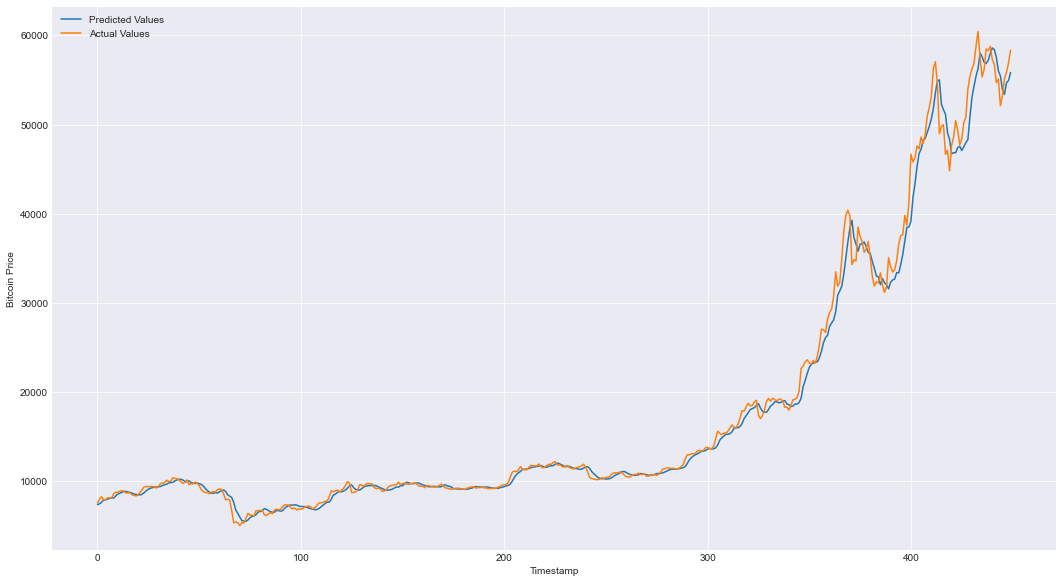

In [138]:
# Plotting the prediction vs test dataset values.
plt.figure(figsize=(18,10))
plt.plot(test_pred2, label='Predicted Values')
plt.plot(y2_test, label='Actual Values')
plt.xlabel('Timestamp')
plt.ylabel('Bitcoin Price')
plt.legend(loc='best')
plt.show()

In [139]:
# Evaluating the prediction using RMSE, MAE and R2 score.
print('Root Mean Square Error:', mean_squared_error(y2_test, test_pred2, squared=False).round(2))
print('Mean Absolute Error:', mean_absolute_error(y2_test, test_pred2).round(2))
print('R-Squared', r2_score(y2_test, test_pred2).round(3))

Root Mean Square Error: 1273.12
Mean Absolute Error: 712.83
R-Squared 0.992


In [153]:
# Building the fourth LSTM model.
np.random.seed(0)
model6 = Sequential([
    Bidirectional(LSTM(64, activation='relu'), input_shape=(1, 10)),
    Dropout(0.15) , 
    Dense(1) 
])
model6.compile(loss='mse' , optimizer= 'adam')

In [154]:
# Fitting the model based on train data.
model6.fit(X_train, y_train, epochs=100, validation_data=[X_test,y_test])

Epoch 1/100
92/92 [==============================] - 2s 5ms/step - loss: 2790947.2500 - val_loss: 3086098.0000
Epoch 2/100
92/92 [==============================] - 0s 3ms/step - loss: 409541.3438 - val_loss: 2652151.7500
Epoch 3/100
92/92 [==============================] - 0s 2ms/step - loss: 365793.7500 - val_loss: 2356809.5000
Epoch 4/100
92/92 [==============================] - 0s 3ms/step - loss: 340894.6562 - val_loss: 2226351.5000
Epoch 5/100
92/92 [==============================] - 0s 2ms/step - loss: 297898.0312 - val_loss: 2714002.0000
Epoch 6/100
92/92 [==============================] - 0s 2ms/step - loss: 280729.1562 - val_loss: 4518411.0000
Epoch 7/100
92/92 [==============================] - 0s 2ms/step - loss: 256374.2812 - val_loss: 3843827.5000
Epoch 8/100
92/92 [==============================] - 0s 2ms/step - loss: 256874.6719 - val_loss: 2608587.7500
Epoch 9/100
92/92 [==============================] - 0s 2ms/step - loss: 237829.7969 - val_loss: 1595177.2500
Epoch 10/

Epoch 75/100
92/92 [==============================] - 0s 2ms/step - loss: 240356.5625 - val_loss: 914550.0000
Epoch 76/100
92/92 [==============================] - 0s 2ms/step - loss: 210529.2812 - val_loss: 949842.3125
Epoch 77/100
92/92 [==============================] - 0s 2ms/step - loss: 215699.9531 - val_loss: 915561.0625
Epoch 78/100
92/92 [==============================] - 0s 2ms/step - loss: 225232.2344 - val_loss: 888789.5625
Epoch 79/100
92/92 [==============================] - 0s 2ms/step - loss: 276118.0000 - val_loss: 1387753.7500
Epoch 80/100
92/92 [==============================] - 0s 2ms/step - loss: 239761.4844 - val_loss: 1143312.1250
Epoch 81/100
92/92 [==============================] - 0s 2ms/step - loss: 222396.8594 - val_loss: 1157582.7500
Epoch 82/100
92/92 [==============================] - 0s 2ms/step - loss: 210617.3594 - val_loss: 1103248.3750
Epoch 83/100
92/92 [==============================] - 0s 2ms/step - loss: 217756.4062 - val_loss: 1164294.3750
Epoch

In [159]:
# Predicting for test data.
test_pred3=model6.predict(X_test)

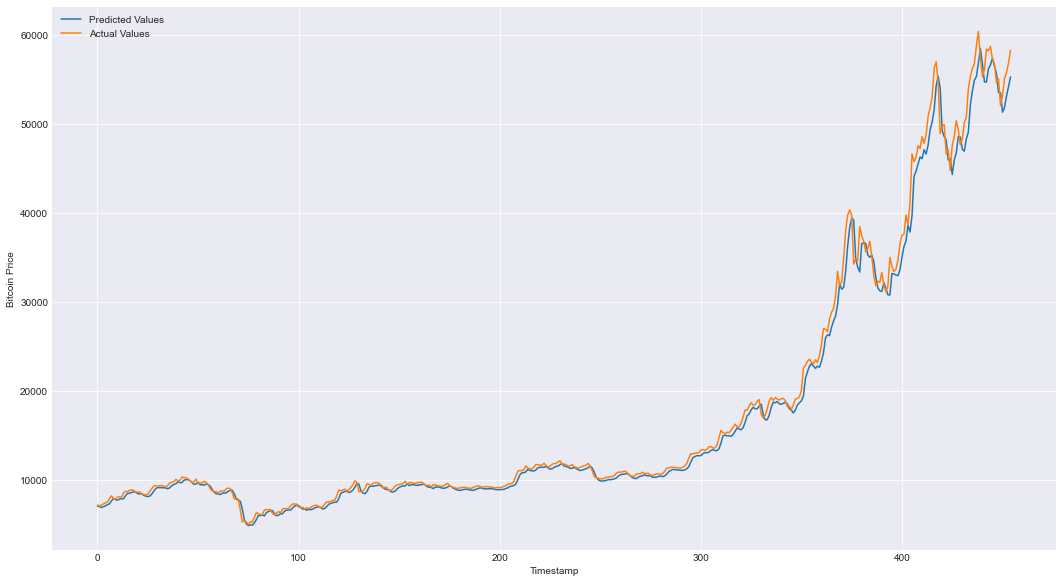

In [160]:
# Plotting the prediction vs test dataset values.
plt.figure(figsize=(18,10))
plt.plot(test_pred3, label='Predicted Values')
plt.plot(y_test, label='Actual Values')
plt.xlabel('Timestamp')
plt.ylabel('Bitcoin Price')
plt.legend(loc='best')
plt.show()

In [163]:
# Building the fifth LSTM model.
np.random.seed(0)
model7 = Sequential([
    Bidirectional(LSTM(64, activation='relu'), input_shape=(1, 100)),
    Dropout(0.15) , 
    Dense(1) 
])
model7.compile(loss='mse' , optimizer= 'adam')

In [164]:
# Fitting the model based on train data.
model7.fit(X1_train, y1_train, epochs=100, validation_data=[X1_test,y1_test])

Epoch 1/100
89/89 [==============================] - 2s 6ms/step - loss: 1344187.7500 - val_loss: 14190577.0000
Epoch 2/100
89/89 [==============================] - 0s 3ms/step - loss: 508917.7812 - val_loss: 4275605.0000
Epoch 3/100
89/89 [==============================] - 0s 2ms/step - loss: 419912.0000 - val_loss: 4345630.0000
Epoch 4/100
89/89 [==============================] - 0s 2ms/step - loss: 476510.4062 - val_loss: 4693696.5000
Epoch 5/100
89/89 [==============================] - 0s 2ms/step - loss: 441569.1562 - val_loss: 8050859.0000
Epoch 6/100
89/89 [==============================] - 0s 3ms/step - loss: 407464.2188 - val_loss: 8839358.0000
Epoch 7/100
89/89 [==============================] - 0s 3ms/step - loss: 339847.1875 - val_loss: 2866439.7500
Epoch 8/100
89/89 [==============================] - 0s 2ms/step - loss: 420314.1250 - val_loss: 3370656.7500
Epoch 9/100
89/89 [==============================] - 0s 3ms/step - loss: 322506.7812 - val_loss: 3228304.5000
Epoch 10

Epoch 75/100
89/89 [==============================] - 0s 2ms/step - loss: 306327.4375 - val_loss: 1577181.7500
Epoch 76/100
89/89 [==============================] - 0s 2ms/step - loss: 360427.0938 - val_loss: 3205437.7500
Epoch 77/100
89/89 [==============================] - 0s 3ms/step - loss: 289800.2188 - val_loss: 1623519.7500
Epoch 78/100
89/89 [==============================] - 0s 3ms/step - loss: 354426.7500 - val_loss: 1862276.6250
Epoch 79/100
89/89 [==============================] - 0s 3ms/step - loss: 293077.2500 - val_loss: 1325230.1250
Epoch 80/100
89/89 [==============================] - 0s 3ms/step - loss: 280582.5312 - val_loss: 1289832.1250
Epoch 81/100
89/89 [==============================] - 0s 2ms/step - loss: 322907.7812 - val_loss: 1636340.6250
Epoch 82/100
89/89 [==============================] - 0s 2ms/step - loss: 299739.2812 - val_loss: 1488438.0000
Epoch 83/100
89/89 [==============================] - 0s 2ms/step - loss: 309721.1250 - val_loss: 3776591.5000
E

In [165]:
# Predicting for test data.
test_pred4=model7.predict(X1_test)

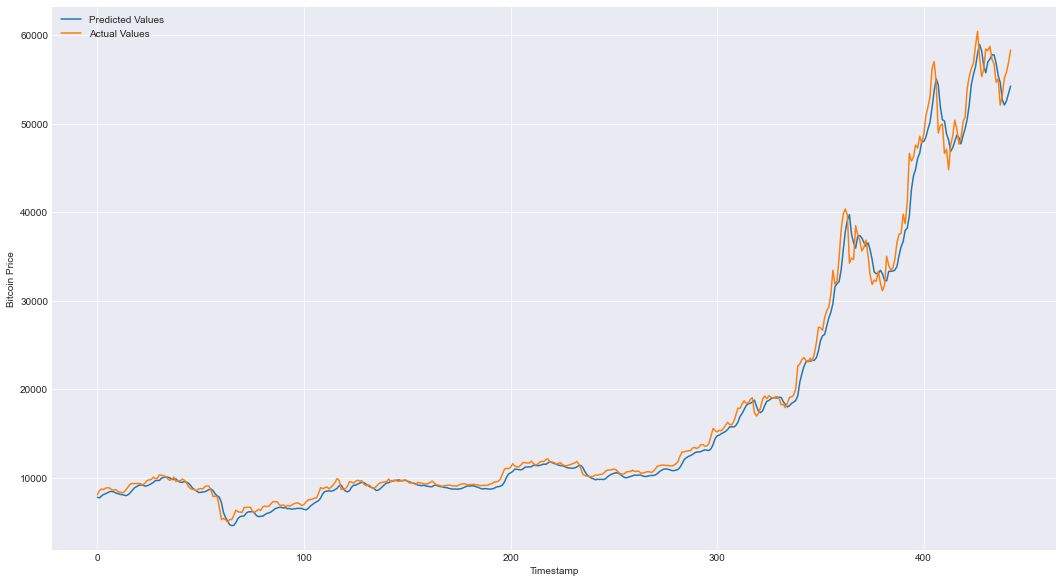

In [166]:
# Plotting the prediction vs test dataset values.
plt.figure(figsize=(18,10))
plt.plot(test_pred4, label='Predicted Values')
plt.plot(y1_test, label='Actual Values')
plt.xlabel('Timestamp')
plt.ylabel('Bitcoin Price')
plt.legend(loc='best')
plt.show()

In [167]:
# Evaluating the prediction using RMSE, MAE and R2 score.
print('Root Mean Square Error:', mean_squared_error(y1_test, test_pred4, squared=False).round(2))
print('Mean Absolute Error:', mean_absolute_error(y1_test, test_pred4).round(2))
print('R-Squared', r2_score(y1_test, test_pred4).round(3))

Root Mean Square Error: 1231.77
Mean Absolute Error: 807.55
R-Squared 0.993


### Inferences from Bidirectional LSTM Models:
- Various models have been built by varying the input shape and epochs to find the optimal model, and five Bidirectional LSTM models have been selected to illustrate the effect of these hyperparameters on the predictions. 
- It is apparent that the model with (1,10) input shape is able to predict better than the other models, which means that the 10 timestep lag is sufficient to predict the future price of bitcoin with a good accuracy. 
- The worst performing model is the one with (1,100) input shape and 30 epochs, but the results improve when the number of epochs in increased to 100 for the same input shape. 
- Therefore, when the timestep lag is huge, the model is able to predict better with higher number of epochs. 
- When the timestep lag is low, the accuracy of the predictions actually decreases with increase in the number of epochs. 
- This might be due to overfitting as a result of too many epochs.

## Stacked LSTM

In [93]:
# Building the sixth LSTM model.
model8=Sequential()
model8.add(LSTM(50, activation='relu', input_shape=(1,10), return_sequences=True))
model8.add(LSTM(50, activation='relu', return_sequences=True))
model8.add(LSTM(50, activation='relu'))
model8.add(Dropout(0.2))
model8.add(Dense(1))
model8.compile(loss='mse' , optimizer= 'adam')

In [94]:
# Fitting the model based on train data.
model8.fit(X_train, y_train, epochs=30, validation_data=[X_test,y_test])

Epoch 1/30
92/92 [==============================] - 4s 9ms/step - loss: 10613980.0000 - val_loss: 5591506.5000
Epoch 2/30
92/92 [==============================] - 0s 4ms/step - loss: 528390.3125 - val_loss: 5765721.0000
Epoch 3/30
92/92 [==============================] - 0s 3ms/step - loss: 458936.7188 - val_loss: 3684534.2500
Epoch 4/30
92/92 [==============================] - 0s 3ms/step - loss: 504579.3750 - val_loss: 5316356.5000
Epoch 5/30
92/92 [==============================] - 0s 3ms/step - loss: 552382.5625 - val_loss: 4263149.5000
Epoch 6/30
92/92 [==============================] - 0s 3ms/step - loss: 543308.5000 - val_loss: 3775640.5000
Epoch 7/30
92/92 [==============================] - 0s 3ms/step - loss: 534644.2500 - val_loss: 3825099.7500
Epoch 8/30
92/92 [==============================] - 0s 4ms/step - loss: 404484.6562 - val_loss: 3480063.2500
Epoch 9/30
92/92 [==============================] - 0s 3ms/step - loss: 426847.2500 - val_loss: 3267404.7500
Epoch 10/30
92/92

In [95]:
# Predicting for test data.
predstacked1=model8.predict(X_test)

In [127]:
# Evaluating the prediction using RMSE, MAE and R2 score.
print('Root Mean Square Error:', mean_squared_error(y_test, predstacked1, squared=False).round(2))
print('Mean Absolute Error:', mean_absolute_error(y_test, predstacked1).round(2))
print('R-Squared', r2_score(y_test, predstacked1).round(4))

Root Mean Square Error: 1472.72
Mean Absolute Error: 918.53
R-Squared 0.9898


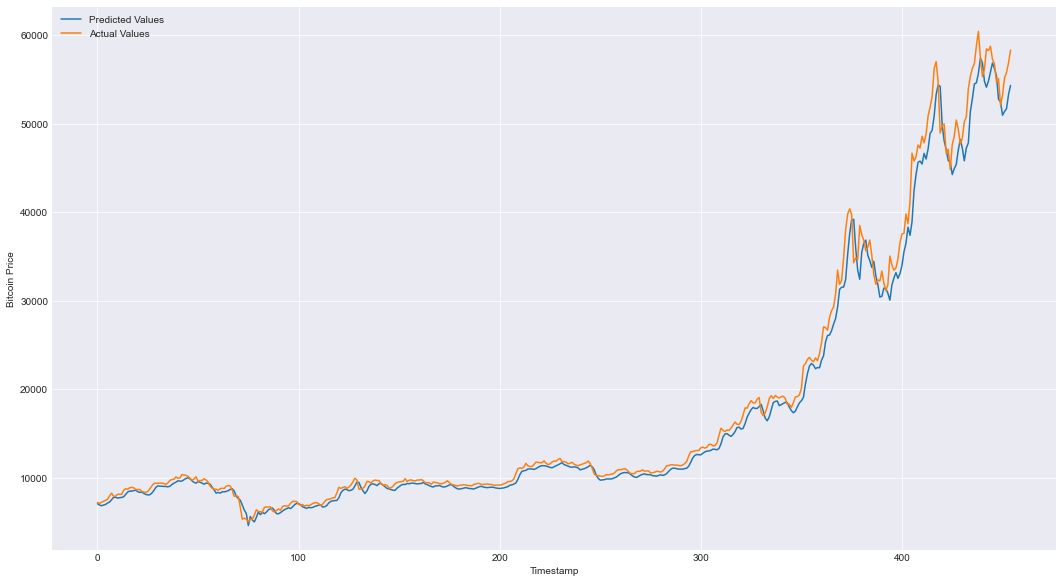

In [134]:
# Plotting the prediction vs test dataset values.
plt.figure(figsize=(18,10))
plt.plot(predstacked1, label='Predicted Values')
plt.plot(y_test, label='Actual Values')
plt.xlabel('Timestamp')
plt.ylabel('Bitcoin Price')
plt.legend(loc='best')
plt.show()

In [105]:
# Building the seventh LSTM model.
model9=Sequential()
model9.add(LSTM(50, activation='relu', input_shape=(1,100), return_sequences=True))
model9.add(LSTM(50, activation='relu', return_sequences=True))
model9.add(LSTM(50, activation='relu'))
model9.add(Dropout(0.2))
model9.add(Dense(1))
model9.compile(loss='mse' , optimizer= 'adam')

In [106]:
# Summary of the model.
model9.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 1, 50)             30200     
                                                                 
 lstm_8 (LSTM)               (None, 1, 50)             20200     
                                                                 
 lstm_9 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 70,651
Trainable params: 70,651
Non-trainable params: 0
_________________________________________________________________


In [107]:
# Fitting the model based on train data.
model9.fit(X1_train, y1_train, epochs=30, validation_data=[X1_test,y1_test])

Epoch 1/30
89/89 [==============================] - 3s 8ms/step - loss: 9205897.0000 - val_loss: 52835652.0000
Epoch 2/30
89/89 [==============================] - 0s 3ms/step - loss: 1907155.6250 - val_loss: 37538424.0000
Epoch 3/30
89/89 [==============================] - 0s 3ms/step - loss: 1302871.0000 - val_loss: 17609380.0000
Epoch 4/30
89/89 [==============================] - 0s 3ms/step - loss: 980498.3125 - val_loss: 11657789.0000
Epoch 5/30
89/89 [==============================] - 0s 4ms/step - loss: 891026.6250 - val_loss: 18857136.0000
Epoch 6/30
89/89 [==============================] - 0s 3ms/step - loss: 784854.0000 - val_loss: 14992816.0000
Epoch 7/30
89/89 [==============================] - 0s 3ms/step - loss: 720721.0625 - val_loss: 7126341.0000
Epoch 8/30
89/89 [==============================] - 0s 3ms/step - loss: 644126.8125 - val_loss: 8609318.0000
Epoch 9/30
89/89 [==============================] - 0s 3ms/step - loss: 651470.5000 - val_loss: 5498508.0000
Epoch 10/3

In [108]:
# Predicting for test data.
predstacked2=model9.predict(X1_test)

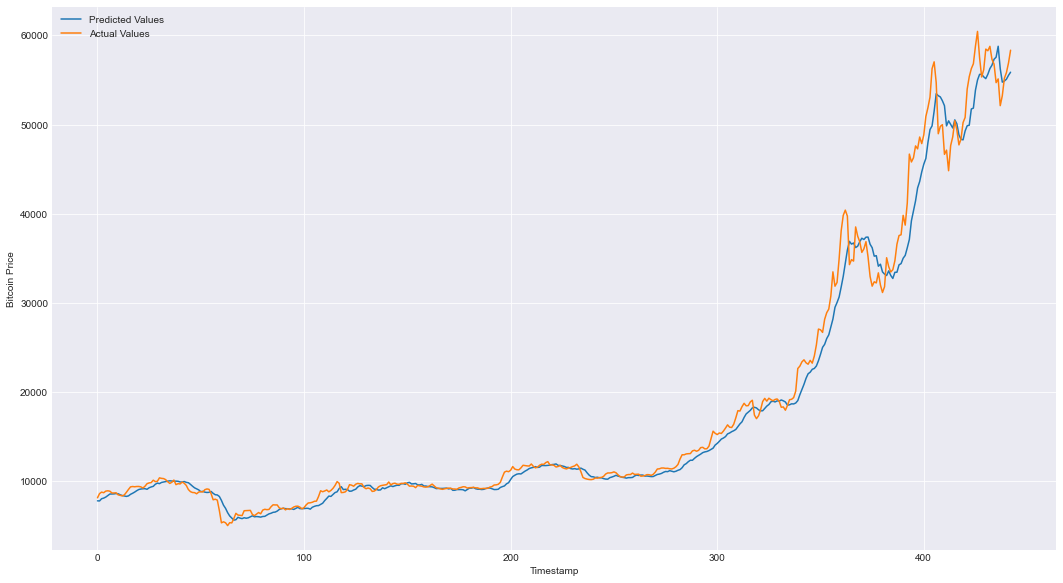

In [109]:
# Plotting the prediction vs test dataset values.
plt.figure(figsize=(18,10))
plt.plot(predstacked2, label='Predicted Values')
plt.plot(y1_test, label='Actual Values')
plt.xlabel('Timestamp')
plt.ylabel('Bitcoin Price')
plt.legend(loc='best')
plt.show()

In [110]:
# Evaluating the prediction using RMSE, MAE and R2 score.
print('Root Mean Square Error:', mean_squared_error(y1_test, predstacked2, squared=False).round(2))
print('Mean Absolute Error:', mean_absolute_error(y1_test, predstacked2).round(2))
print('R-Squared', r2_score(y1_test, predstacked2).round(3))

Root Mean Square Error: 1759.31
Mean Absolute Error: 1044.59
R-Squared 0.986


In [121]:
# Building the eigth LSTM model.
model10=Sequential()
model10.add(LSTM(50, activation='relu', input_shape=(1,100), return_sequences=True))
model10.add(LSTM(50, activation='relu', return_sequences=True))
model10.add(LSTM(50, activation='relu'))
model10.add(Dropout(0.2))
model10.add(Dense(1))
model10.compile(loss='mse' , optimizer= 'adam')

In [122]:
# Fitting the model based on train data.
model10.fit(X1_train, y1_train, epochs=100, validation_data=[X1_test,y1_test])

Epoch 1/100
89/89 [==============================] - 3s 8ms/step - loss: 9031274.0000 - val_loss: 109729008.0000
Epoch 2/100
89/89 [==============================] - 0s 3ms/step - loss: 2041458.3750 - val_loss: 99990384.0000
Epoch 3/100
89/89 [==============================] - 0s 3ms/step - loss: 1355943.6250 - val_loss: 37007280.0000
Epoch 4/100
89/89 [==============================] - 0s 3ms/step - loss: 1090807.0000 - val_loss: 8272150.0000
Epoch 5/100
89/89 [==============================] - 0s 3ms/step - loss: 1038302.3125 - val_loss: 9824261.0000
Epoch 6/100
89/89 [==============================] - 0s 3ms/step - loss: 761533.0000 - val_loss: 26790246.0000
Epoch 7/100
89/89 [==============================] - 0s 3ms/step - loss: 718440.4375 - val_loss: 5823742.5000
Epoch 8/100
89/89 [==============================] - 0s 3ms/step - loss: 686019.3125 - val_loss: 6282733.0000
Epoch 9/100
89/89 [==============================] - 0s 3ms/step - loss: 558069.8125 - val_loss: 7155380.5000


Epoch 75/100
89/89 [==============================] - 0s 3ms/step - loss: 346444.0625 - val_loss: 2562030.7500
Epoch 76/100
89/89 [==============================] - 0s 4ms/step - loss: 379118.0625 - val_loss: 2028566.3750
Epoch 77/100
89/89 [==============================] - 0s 4ms/step - loss: 353035.5625 - val_loss: 2083187.8750
Epoch 78/100
89/89 [==============================] - 0s 3ms/step - loss: 344577.5000 - val_loss: 1916829.1250
Epoch 79/100
89/89 [==============================] - 0s 4ms/step - loss: 326564.7188 - val_loss: 2246263.0000
Epoch 80/100
89/89 [==============================] - 0s 3ms/step - loss: 420855.7812 - val_loss: 5573969.5000
Epoch 81/100
89/89 [==============================] - 0s 4ms/step - loss: 330740.5625 - val_loss: 2029654.6250
Epoch 82/100
89/89 [==============================] - 0s 3ms/step - loss: 326136.0938 - val_loss: 5384176.5000
Epoch 83/100
89/89 [==============================] - 0s 4ms/step - loss: 348073.3125 - val_loss: 2055850.8750
E

In [123]:
# Predicting for test data.
predstacked3=model10.predict(X1_test)

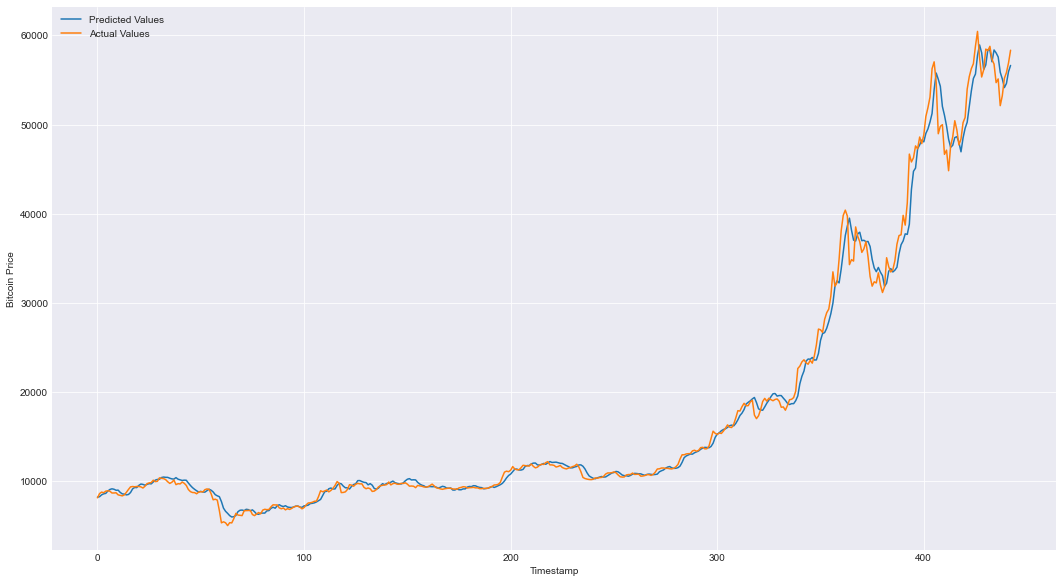

In [124]:
# Plotting the prediction vs test dataset values.
plt.figure(figsize=(18,10))
plt.plot(predstacked3, label='Predicted Values')
plt.plot(y1_test, label='Actual Values')
plt.xlabel('Timestamp')
plt.ylabel('Bitcoin Price')
plt.legend(loc='best')
plt.show()

In [125]:
# Evaluating the prediction using RMSE, MAE and R2 score.
print('Root Mean Square Error:', mean_squared_error(y1_test, predstacked3, squared=False).round(2))
print('Mean Absolute Error:', mean_absolute_error(y1_test, predstacked3).round(2))
print('R-Squared', r2_score(y1_test, predstacked3).round(3))

Root Mean Square Error: 1221.06
Mean Absolute Error: 691.25
R-Squared 0.993


In [128]:
# Building the ninth LSTM model.
model11=Sequential()
model11.add(LSTM(50, activation='relu', input_shape=(1,10), return_sequences=True))
model11.add(LSTM(50, activation='relu', return_sequences=True))
model11.add(LSTM(50, activation='relu'))
model11.add(Dropout(0.2))
model11.add(Dense(1))
model11.compile(loss='mse' , optimizer= 'adam')

In [129]:
# Fitting the model based on train data.
model11.fit(X_train, y_train, epochs=100, validation_data=[X_test,y_test])

Epoch 1/100
92/92 [==============================] - 3s 7ms/step - loss: 9378770.0000 - val_loss: 26075364.0000
Epoch 2/100
92/92 [==============================] - 0s 4ms/step - loss: 656968.8750 - val_loss: 4084533.5000
Epoch 3/100
92/92 [==============================] - 0s 3ms/step - loss: 554965.3125 - val_loss: 5456652.5000
Epoch 4/100
92/92 [==============================] - 0s 3ms/step - loss: 595430.3125 - val_loss: 3391334.5000
Epoch 5/100
92/92 [==============================] - 0s 3ms/step - loss: 527207.8750 - val_loss: 4739096.0000
Epoch 6/100
92/92 [==============================] - 0s 3ms/step - loss: 492598.1250 - val_loss: 5074159.0000
Epoch 7/100
92/92 [==============================] - 0s 3ms/step - loss: 448930.3750 - val_loss: 4899786.0000
Epoch 8/100
92/92 [==============================] - 0s 3ms/step - loss: 436484.3125 - val_loss: 7754549.0000
Epoch 9/100
92/92 [==============================] - 0s 3ms/step - loss: 471201.1250 - val_loss: 2644637.0000
Epoch 10

Epoch 75/100
92/92 [==============================] - 0s 3ms/step - loss: 464111.4688 - val_loss: 1207751.0000
Epoch 76/100
92/92 [==============================] - 0s 3ms/step - loss: 358876.4062 - val_loss: 1372981.1250
Epoch 77/100
92/92 [==============================] - 0s 3ms/step - loss: 365561.0000 - val_loss: 1819437.2500
Epoch 78/100
92/92 [==============================] - 0s 3ms/step - loss: 377839.6250 - val_loss: 1217151.1250
Epoch 79/100
92/92 [==============================] - 0s 3ms/step - loss: 380987.6562 - val_loss: 3138261.0000
Epoch 80/100
92/92 [==============================] - 0s 3ms/step - loss: 376782.9688 - val_loss: 957252.8125
Epoch 81/100
92/92 [==============================] - 0s 3ms/step - loss: 345284.9062 - val_loss: 1095288.5000
Epoch 82/100
92/92 [==============================] - 0s 4ms/step - loss: 371537.4375 - val_loss: 1042285.9375
Epoch 83/100
92/92 [==============================] - 0s 3ms/step - loss: 351067.0625 - val_loss: 1668179.1250
Ep

In [130]:
# Predicting for test data.
predstacked4=model11.predict(X_test)

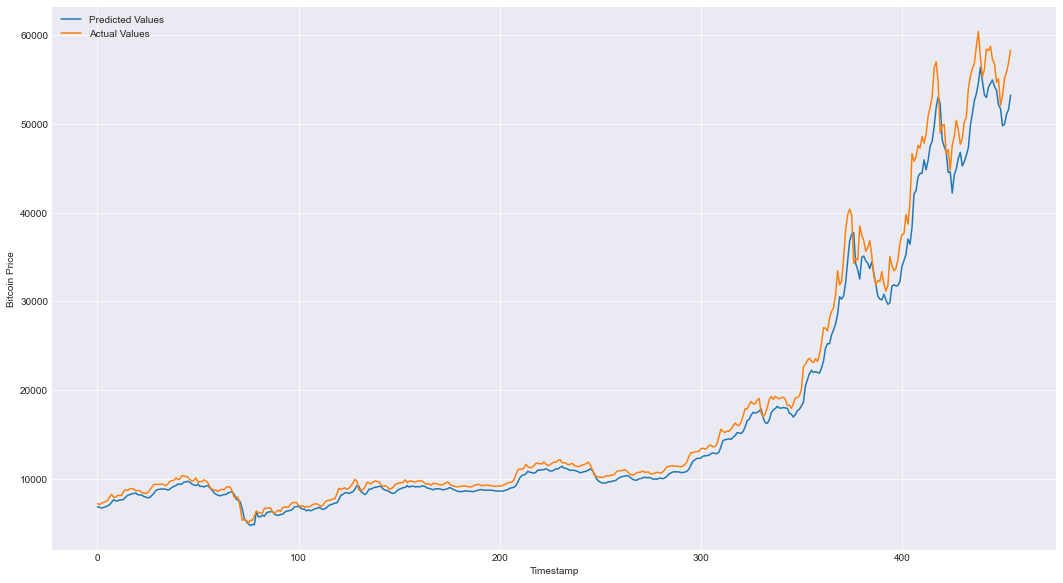

In [131]:
# Plotting the prediction vs test dataset values.
plt.figure(figsize=(18,10))
plt.plot(predstacked4, label='Predicted Values')
plt.plot(y_test, label='Actual Values')
plt.xlabel('Timestamp')
plt.ylabel('Bitcoin Price')
plt.legend(loc='best')
plt.show()

In [132]:
# Evaluating the prediction using RMSE, MAE and R2 score.
print('Root Mean Square Error:', mean_squared_error(y_test, predstacked4, squared=False).round(2))
print('Mean Absolute Error:', mean_absolute_error(y_test, predstacked4).round(2))
print('R-Squared', r2_score(y_test, predstacked4).round(3))

Root Mean Square Error: 1831.77
Mean Absolute Error: 1243.08
R-Squared 0.984


### Inferences from Stacked LSTM Models:
- The same approach used in Bidirectional LSTM is followed in Stacked LSTM.
- A similar trend is observed as seen in the Bidirectional LSTM models regarding the effect of input shape and epochs. 
- When the timestep lag is in the higher range, the model is able to predict better with higher number of epochs. 
- When the timestep lag is in the lower range, the accuracy of the predictions actually decreases with increase in the number of epochs. 
- The reason for this can be overfitting as a result of too many epochs, which basically means when the model runs through the entire dataset too many times, there is higher tendency to memorize the data points.

## Conclusions
- By visualizing the predictions, it was clearly evident that the ARIMA model could not predict Bitcoin price for the long term. As a result, an ARIMA model to forecast for a shorter period of time was built. 
- Every time the ARIMA model forecasted for a certain day, it was updated using prior day forecasts. This model provided decent results with an R2 score of 0.996 RMSE of 891.42 and MAE of 459.6. 
- Hence, it can be said that the ARIMA is capable of predicting only for the short term.
- The ARIMAX model provided exceptional results with an incredible R2 Score of 0.9999 and very low RMSE of 154.19 and MAE of 83.79.
- ARIMAX model outperformed the standard ARIMA model in short term and long term predictions.
- Both bidirectional and stacked LSTM models were developed using a similar approach, with bidirectional LSTM marginally outperforming stacked LSTM.
- Comparing the performances of all the proposed models in terms of RMSE and MAE it can be deduced that the best performing technique to predict the bitcoin price is the ARIMAX model. 